This notebook consists of different methods to find optimal no of clusters for GMM and K-means, namely:
1) BIC
2) AIC
3) Gap Stats
4) Elbow Curve

# Import Necessary Modules

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rc
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering, spectral_clustering
from sklearn import metrics
from sklearn.metrics import pairwise_distances, silhouette_samples, silhouette_score
from sklearn import datasets
from scipy.spatial.distance import cdist



# Use logdiff value

In [2]:
stirling_file = '/Users/indrikwijaya/Downloads/stirling_logdiff.txt'
stirling_df = pd.read_csv(stirling_file, sep = '\t')
stirling_df.head()

time1     time2     time3     time4     time5     time6     time7
Q0010      0  1.741840 -0.495047 -0.029999  0.610275  1.067043  1.645865
Q0017      0  1.299452  0.236848 -0.404394  0.891562  1.397428  2.081607
Q0032      0  0.624103  0.434149  0.984648  0.543161  1.189677  1.944824
Q0055      0  0.326863  0.593972  0.655451  0.546563  1.077275  1.717299
Q0065      0  0.354283  0.462760  0.443381  0.567160  1.024055  1.594383

# Use Log expression values


In [3]:
rna_cru_df = pd.read_csv('/Users/indrikwijaya/Desktop/rna_logrpkm/rna_cru.txt', sep = '\t')
print('rna_cru')
print(rna_cru_df.describe())

rna_cru_mito_df = pd.read_csv('/Users/indrikwijaya/Desktop/rna_logrpkm/rna_cru_mito.txt', sep = '\t')
print('rna_cru_mito')
print(rna_cru_mito_df.describe())

rna_tot_df = pd.read_csv('/Users/indrikwijaya/Desktop/rna_logrpkm/rna_tot.txt', sep = '\t')
print('rna_tot')
print(rna_tot_df.describe())

rna_tot_mito_df = pd.read_csv('/Users/indrikwijaya/Desktop/rna_logrpkm/rna_tot_mito.txt', sep = '\t')
print('rna_tot_mito')
print(rna_tot_mito_df.describe())



rna_cru
                t0           t1           t2           t3           t4  \
count  8675.000000  8675.000000  8675.000000  8675.000000  8675.000000   
mean      3.812212     3.656415     3.403094     3.286875     3.493980   
std       2.187742     2.220167     2.320203     2.292112     2.291528   
min      -2.971029    -3.569787    -3.624772    -3.690308    -4.602689   
25%       2.305375     2.115710     1.774626     1.655563     1.924866   
50%       3.740061     3.513096     3.186570     3.100348     3.347354   
75%       5.242172     5.110586     4.830624     4.732912     4.937427   
max      12.561376    12.260835    13.574961    14.555974    14.507771   

                t5           t6  
count  8675.000000  8675.000000  
mean      3.623789     3.764051  
std       2.111514     2.170488  
min      -3.527650    -4.096016  
25%       2.198859     2.297647  
50%       3.457686     3.639148  
75%       4.910698     5.113921  
max      14.457282    13.571942  
rna_cru_mito
      

In [4]:
test = pd.read_csv('/Users/indrikwijaya/Desktop/rna_cru.txt', sep = '\t')
test.iloc[:,1:].values[0]

array([ 5.30871049,  4.36202971,  4.29453231,  4.2778863 ,  4.25099148,
        3.42540667,  4.31801443])

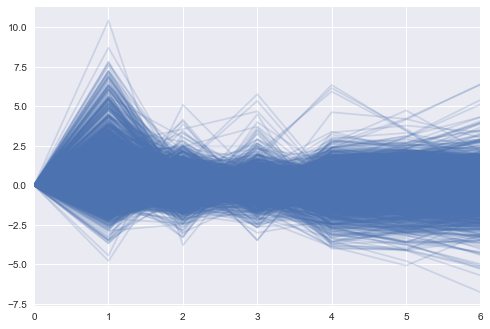

In [5]:
ax = None
ax = sns.tsplot(ax =ax, data = stirling_df.values, err_style = 'unit_traces')
plt.show()

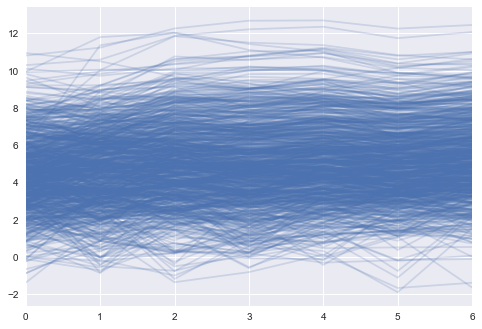

In [6]:
ax = None
ax = sns.tsplot(ax =ax, data = rna_cru_mito_df.values, err_style = 'unit_traces')
plt.show()

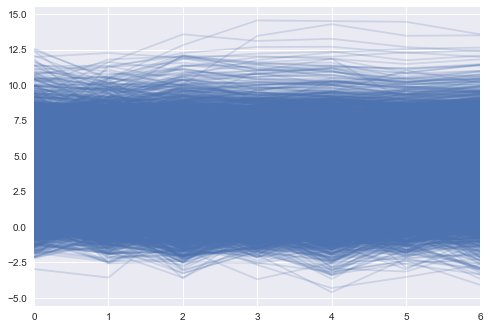

In [7]:
ax = None
ax = sns.tsplot(ax =ax, data = rna_cru_df.values, err_style = 'unit_traces')
plt.show()

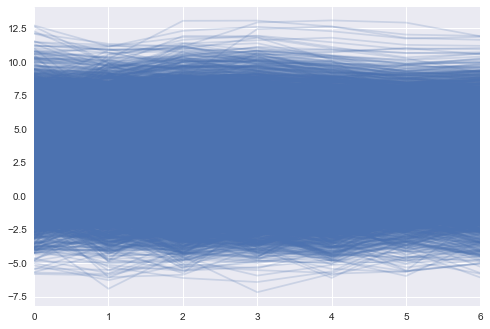

In [8]:
ax = None
ax = sns.tsplot(ax =ax, data = rna_tot_df.values, err_style = 'unit_traces')
plt.show()

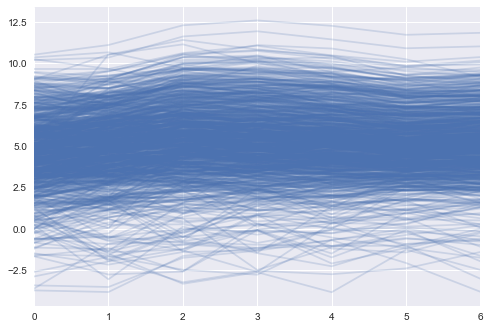

In [9]:
ax = None
ax = sns.tsplot(ax =ax, data = rna_tot_mito_df.values, err_style = 'unit_traces')
plt.show()

# BIC for GMM

In [10]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

def bic_gmm(dataframe):

    # Number of samples per component
    n_samples = len(dataframe.iloc[:,1])
    #n_samples = len(t4_t6_te['TE_x'])

    # Generate random sample, two components
    np.random.seed(0)
    #C = np.array([[0., -0.1], [1.7, .4]])
    # X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
    #           .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

    X = dataframe.values
    #[['TE_x','TE_y']].values
    #X = t4_t6_te[['TE_x', 'TE_y']].values
    #print(X)

    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 21)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            gmm.fit(X)
            bic.append(gmm.bic(X))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm

    bic = np.array(bic)
    color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                                  'darkorange'])
    clf = best_gmm
    print(clf)
    bars = []

    # Plot the BIC scores
#     plt.figure(figsize = (10,15))

#     spl = plt.subplot(2, 1, 1)
#     for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
#         xpos = np.array(n_components_range) + .2 * (i - 2)
#         bars.append(plt.bar(xpos, bic[i * len(n_components_range):
#                                       (i + 1) * len(n_components_range)],
#                             width=.2, color=color))
#     plt.xticks(n_components_range)
#     plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
#     plt.title('BIC score per model')
#     xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
#         .2 * np.floor(bic.argmin() / len(n_components_range))
#     plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
#     spl.set_xlabel('Number of components')
#     spl.legend([b[0] for b in bars], cv_types)

#     # Plot the winner
#     splot = plt.subplot(2, 1, 2)
#     Y_ = clf.predict(X)

#     for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
#                                                color_iter)):
#         v, w = linalg.eigh(cov)
#         if not np.any(Y_ == i):
#             continue
#         plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

#         # Plot an ellipse to show the Gaussian component
#         angle = np.arctan2(w[0][1], w[0][0])
#         angle = 180. * angle / np.pi  # convert to degrees
#         v = 2. * np.sqrt(2.) * np.sqrt(v)
#         ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
#         ell.set_clip_box(splot.bbox)
#         ell.set_alpha(.5)
#         splot.add_artist(ell)
#     plt.xticks(())
#     plt.yticks(())
#     plt.title('Selected GMM: ' + clf.covariance_type +', '+ str(clf.n_components))
#     plt.subplots_adjust(hspace=.35, bottom=.02)
#     #plt.show()
#     #return bic

In [11]:
bic_gmm(stirling_df)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=17, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)


In [12]:
print('bic_rna_cru')
bic_rna_cru = bic_gmm(rna_cru_df)
print(bic_rna_cru)

print('bic_rna_cru_mito')
bic_rna_cru_mito = bic_gmm(rna_cru_mito_df)
print(bic_rna_cru_mito)

print('bic_rna_tot')
bic_rna_tot = bic_gmm(rna_tot_df)
print(bic_rna_tot)

print('bic_rna_tot_mito')
bic_rna_tot_mito = bic_gmm(rna_tot_mito_df)
print(bic_rna_tot_mito)

bic_rna_cru
GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=5, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)
None
bic_rna_cru_mito
GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)
None
bic_rna_tot
GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=8, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)
None
bic_rna_tot_mito
GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        

# AIC for GMM

In [13]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

def aic_gmm(dataframe):

    # Number of samples per component
    n_samples = len(dataframe.iloc[:,1])
    #n_samples = len(t4_t6_te['TE_x'])

    # Generate random sample, two components
    np.random.seed(0)
    #C = np.array([[0., -0.1], [1.7, .4]])
    # X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
    #           .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

    X = dataframe.values
    #[['TE_x','TE_y']].values
    #X = t4_t6_te[['TE_x', 'TE_y']].values
    #print(X)

    lowest_aic = np.infty
    aic = []
    log_likelihood = []
    n_components_range = range(1, 21)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            gmm.fit(X)
            aic.append(gmm.aic(X))
            log_likelihood.append(gmm.score(X))
            
            if aic[-1] < lowest_aic:
                lowest_aic = aic[-1]
                best_gmm = gmm

    aic = np.array(aic)
    log_likelihood = np.array(log_likelihood)
    color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                                  'darkorange'])
    clf = best_gmm
    print(clf)
    bars = []

    # Plot the AIC scores
    plt.figure(figsize = (10,15))

    spl = plt.subplot(2, 1, 1)
    for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
        xpos = np.array(n_components_range) + .2 * (i - 2)
        bars.append(plt.bar(xpos, aic[i * len(n_components_range):
                                      (i + 1) * len(n_components_range)],
                            width=.2, color=color))
    plt.xticks(n_components_range)
    plt.ylim([aic.min() * 1.01 - .01 * aic.max(), aic.max()])
    plt.title('AIC score per model')
    xpos = np.mod(aic.argmin(), len(n_components_range)) + .65 +\
        .2 * np.floor(aic.argmin() / len(n_components_range))
    plt.text(xpos, aic.min() * 0.97 + .03 * aic.max(), '*', fontsize=14)
    spl.set_xlabel('Number of components')
    spl.legend([b[0] for b in bars], cv_types)
    
#     for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
#         xpos = np.array(n_components_range) + .2 * (i - 2)
#         bars.append(plt.bar(xpos, log_likelihood[i * len(n_components_range):
#                                       (i + 1) * len(n_components_range)],
#                             width=.2, color=color))
#     plt.xticks(n_components_range)
#     plt.ylim([log_likelihood.min() * 1.01 - .01 * log_likelihood.max(), log_likelihood.max()])
#     plt.title('log likelihood score per model')
#     xpos = np.mod(log_likelihood.argmin(), len(n_components_range)) + .65 +\
#         .2 * np.floor(log_likelihood.argmin() / len(n_components_range))
#     plt.text(xpos, log_likelihood.min() * 0.97 + .03 * log_likelihood.max(), '*', fontsize=14)
#     spl.set_xlabel('Number of components')
#     spl.legend([b[0] for b in bars], cv_types)

    # Plot the winner
    splot = plt.subplot(2, 1, 2)
    Y_ = clf.predict(X)

#     for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
#                                                color_iter)):
#         v, w = linalg.eigh(cov)
#         if not np.any(Y_ == i):
#             continue
#         plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

#         # Plot an ellipse to show the Gaussian component
#         angle = np.arctan2(w[0][1], w[0][0])
#         angle = 180. * angle / np.pi  # convert to degrees
#         v = 2. * np.sqrt(2.) * np.sqrt(v)
#         ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
#         ell.set_clip_box(splot.bbox)
#         ell.set_alpha(.5)
#         splot.add_artist(ell)
#     plt.xticks(())
#     plt.yticks(())
#     plt.title('Selected GMM: ' + clf.covariance_type +', '+ str(clf.n_components))
#     plt.subplots_adjust(hspace=.35, bottom=.02)
    #plt.show()
    #return aic


In [14]:
print('aic_rna_cru')
aic_rna_cru = aic_gmm(rna_cru_df)
print(aic_rna_cru)

print('aic_rna_cru_mito')
aic_rna_cru_mito = aic_gmm(rna_cru_mito_df)
print(aic_rna_cru_mito)

print('aic_rna_tot')
aic_rna_tot = aic_gmm(rna_tot_df)
print(aic_rna_tot)

print('aic_rna_tot_mito')
aic_rna_tot_mito = aic_gmm(rna_tot_mito_df)
print(aic_rna_tot_mito)

aic_rna_cru
GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=13, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)
None
aic_rna_cru_mito
GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=14, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)
None
aic_rna_tot
GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=20, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)
None
aic_rna_tot_mito
GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
     

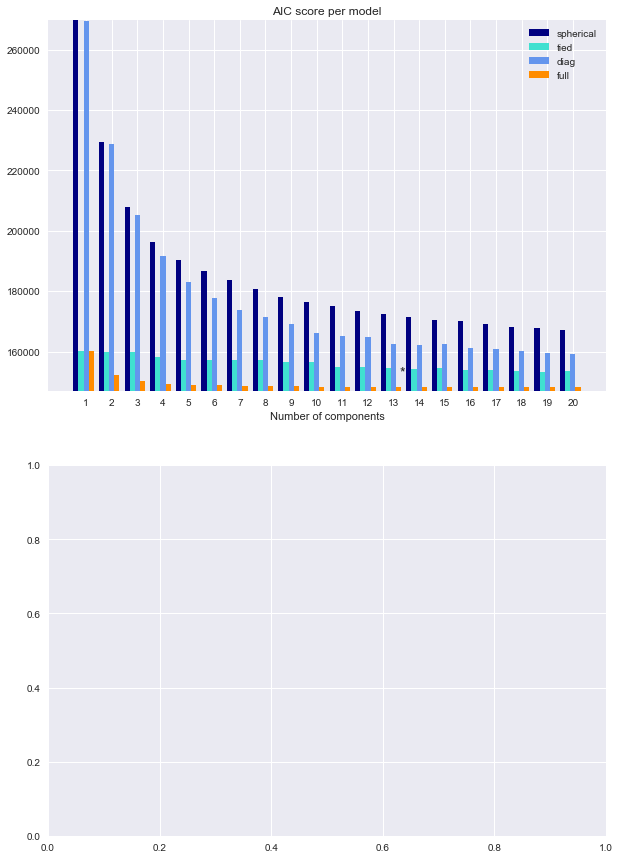

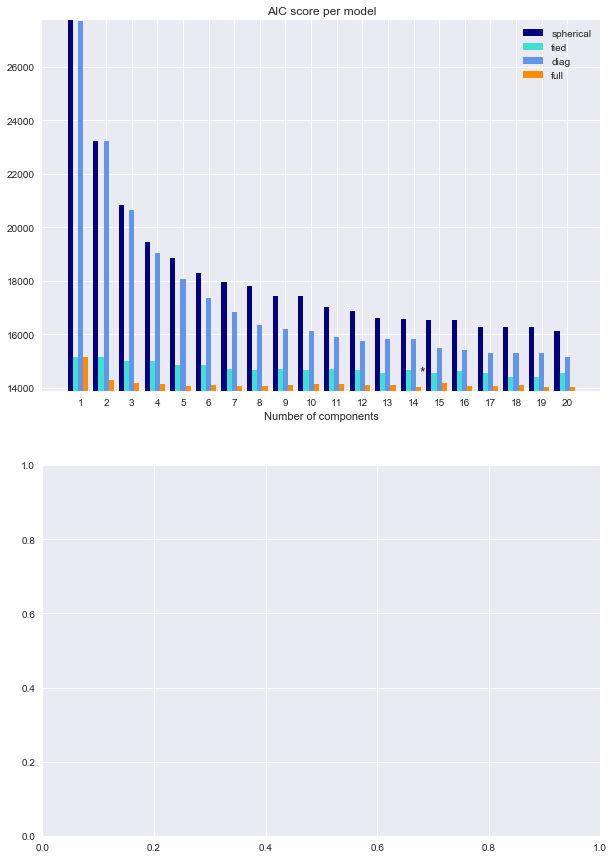

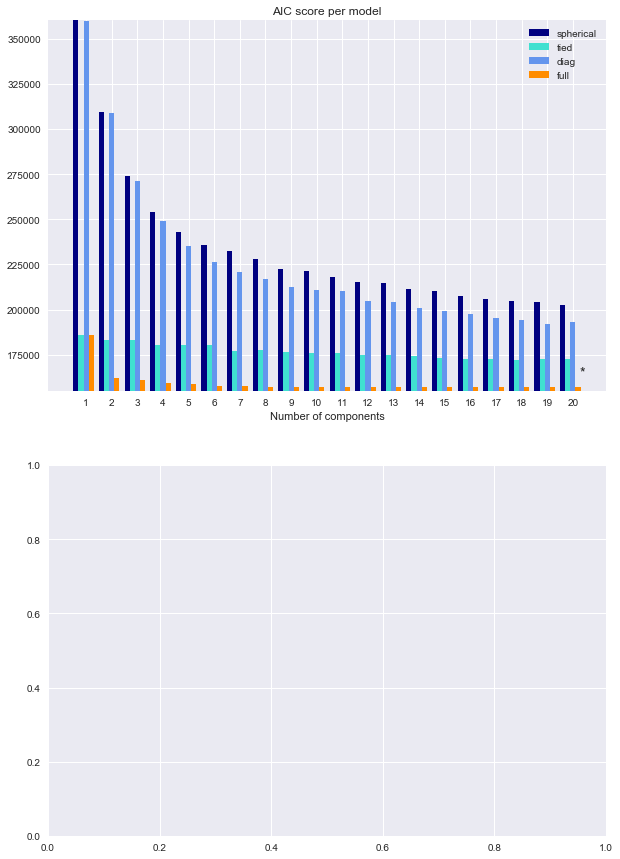

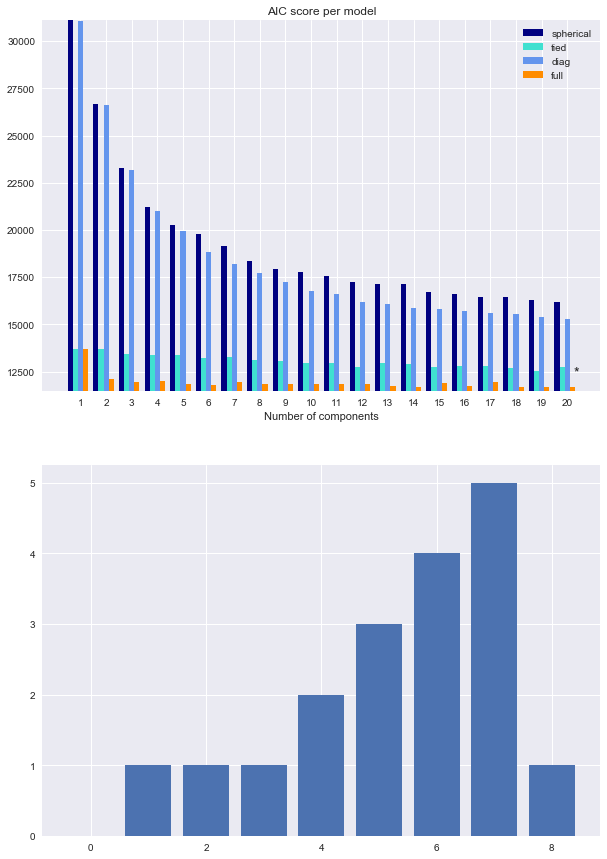

In [15]:
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]
test = np.array([0,1,1,1,2,3,4,5,1])
test_x = np.arange(len(test))
plt.bar(test_x, test)
plt.show()

In [16]:
rna_cru_df.values

array([[ 5.30871049,  4.36202971,  4.29453231, ...,  4.25099148,
         3.42540667,  4.31801443],
       [ 5.25036651,  3.52232601,  2.39230753, ...,  1.59770091,
         1.70409767,  2.47207878],
       [ 0.21967695, -0.37908053, -0.79450124, ...,  0.69629436,
         0.70315545, -0.23668269],
       ..., 
       [ 4.1362433 ,  2.97805841,  2.75765369, ...,  2.80550579,
         2.91190256,  2.82672505],
       [ 0.57852343,  2.70768641,  3.85666688, ...,  4.84304341,
         4.91107188,  4.55261635],
       [ 0.17942748,  3.04010162,  4.03561401, ...,  3.8259699 ,
         3.34740416,  4.08061985]])

# GMM with optimal no of clusters

In [17]:
def plot_clusters(gene_df, n_components, covar_type, *path):
    gene_gmm = GMM(n_components= n_components, covariance_type = covar_type).fit(gene_df.values)
    gene_gmm_labels = gene_gmm.predict(gene_df.values)
    s = pd.Series(gene_gmm_labels)
    clusters = s.unique()
    
    #writer = pd.ExcelWriter(path[0], engine = 'xlsxwriter')
    gmm_cluster = []
    for c in clusters:
        cluster_indices = s[s==c].index
        print("Cluster %d number of entries %d" % (c, len(cluster_indices)))
        gene_df.T.iloc[:, cluster_indices].plot(legend = False)
        #gene_df.T.iloc[:, cluster_indices].transpose().to_excel(writer, sheet_name = str(c))
        plt.title('%d genes' % len(cluster_indices))
        #plt.savefig('/Users/indrikwijaya/Desktop/Cluster_%d_%d.png' % (c, len(cluster_indices)))
        plt.show()
    #writer.save()

In [18]:
plot_clusters(rna_cru_df, 14, 'full')

NameError: name 'GMM' is not defined

In [ ]:
stirling_gmm.score_samples(stirling_df.values)

In [ ]:
stirling_kmeans = KMeans(n_clusters = 18, random_state=1).fit(stirling_df.values)

Cluster 17 number of entries 147


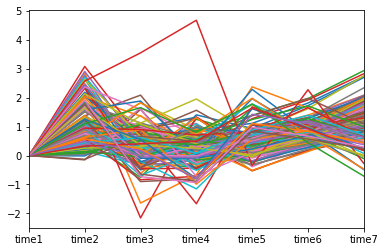

Cluster 0 number of entries 871


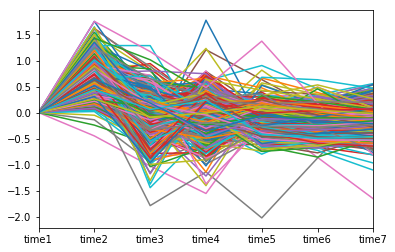

Cluster 14 number of entries 301


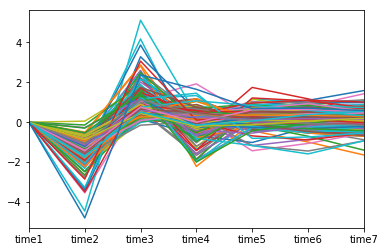

Cluster 10 number of entries 494


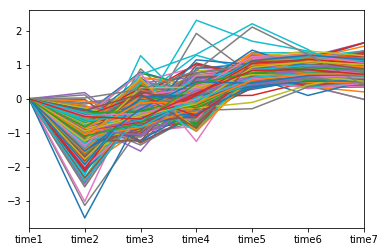

Cluster 3 number of entries 167


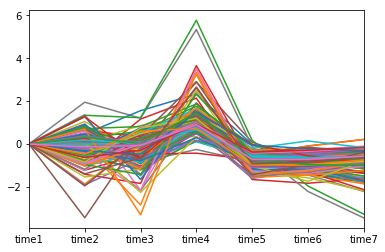

Cluster 1 number of entries 349


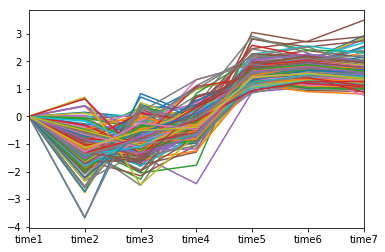

Cluster 2 number of entries 558


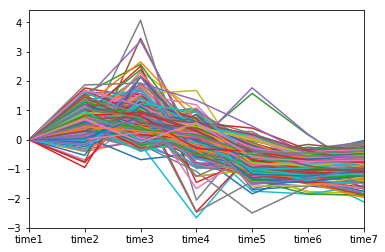

Cluster 15 number of entries 1033


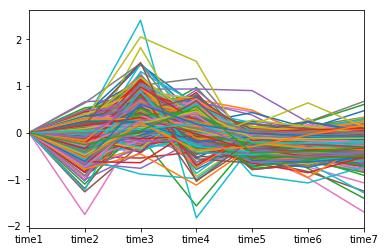

Cluster 16 number of entries 63


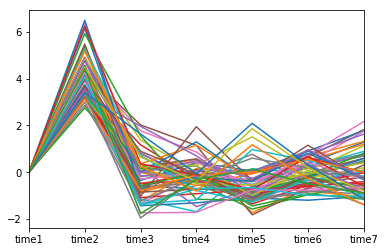

Cluster 7 number of entries 217


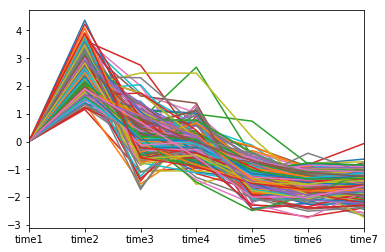

Cluster 9 number of entries 26


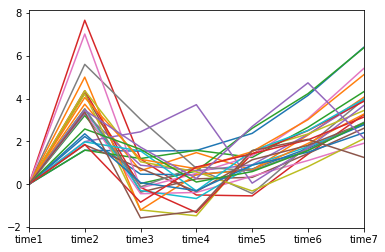

Cluster 5 number of entries 1024


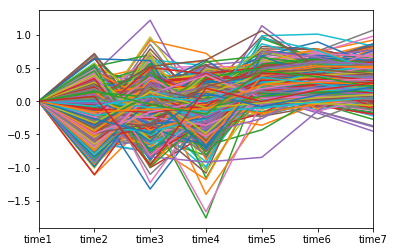

Cluster 11 number of entries 396


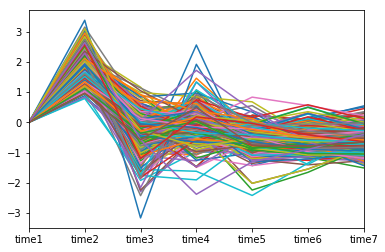

Cluster 8 number of entries 306


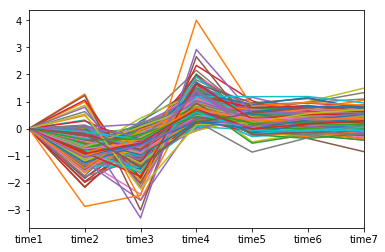

Cluster 4 number of entries 49


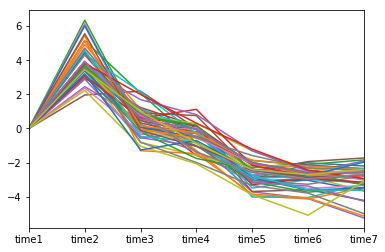

Cluster 6 number of entries 35


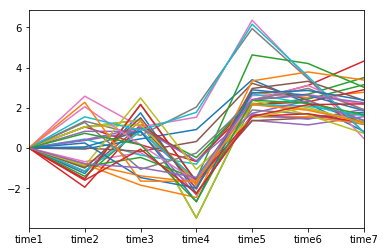

Cluster 13 number of entries 51


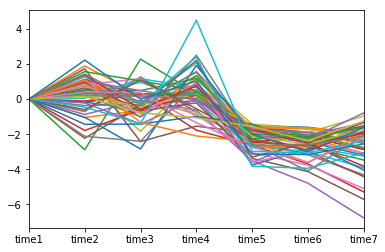

Cluster 12 number of entries 62


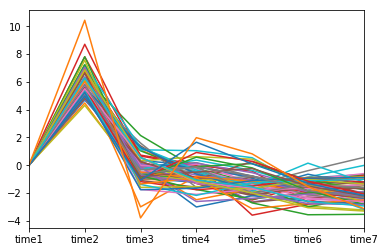

In [22]:
s = pd.Series(stirling_kmeans.labels_)
clusters = s.unique()
for c in clusters:
    cluster_indices = s[s==c].index
    print("Cluster %d number of entries %d" % (c, len(cluster_indices)))
    stirling_df.T.iloc[:, cluster_indices].plot(legend = False)
    plt.show()

In [23]:
hac = AgglomerativeClustering(n_clusters=18, 
                                      linkage = 'average',
                                      affinity = 'euclidean')
stirling_hac = hac.fit(stirling_df.values)

Cluster 2 number of entries 5909


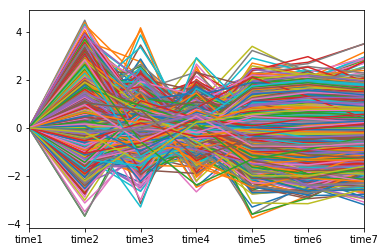

Cluster 1 number of entries 116


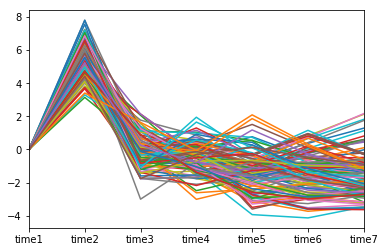

Cluster 8 number of entries 2


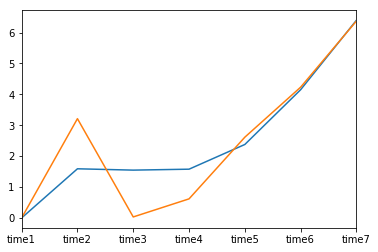

Cluster 5 number of entries 26


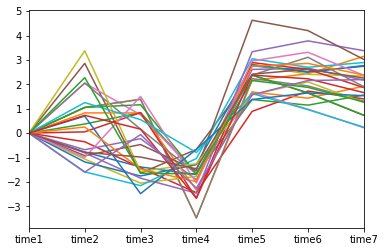

Cluster 0 number of entries 21


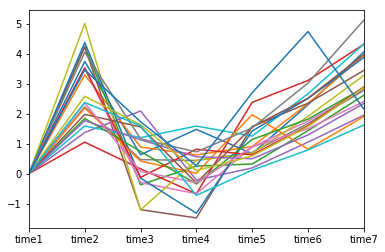

Cluster 14 number of entries 27


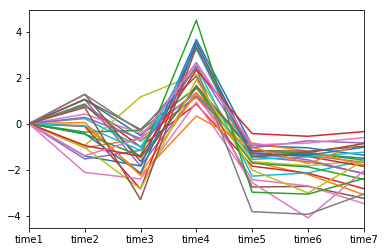

Cluster 4 number of entries 9


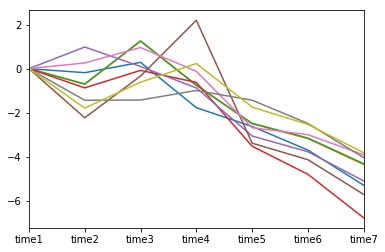

Cluster 6 number of entries 3


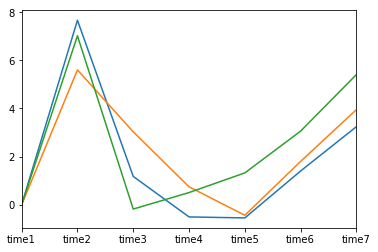

Cluster 13 number of entries 14


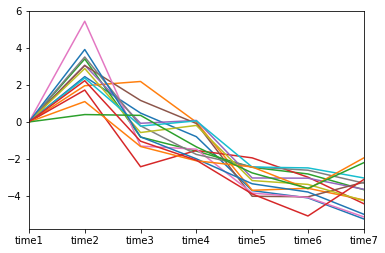

Cluster 11 number of entries 9


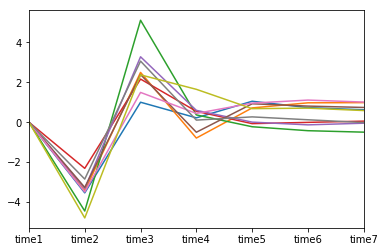

Cluster 3 number of entries 4


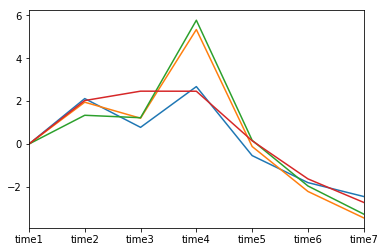

Cluster 17 number of entries 1


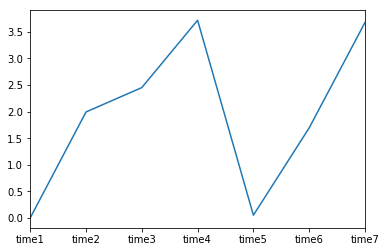

Cluster 15 number of entries 1


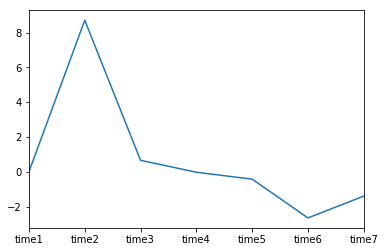

Cluster 9 number of entries 3


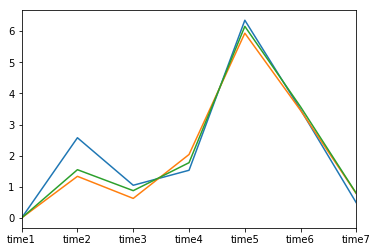

Cluster 10 number of entries 1


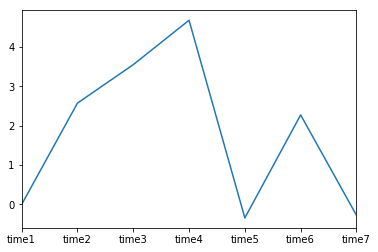

Cluster 16 number of entries 1


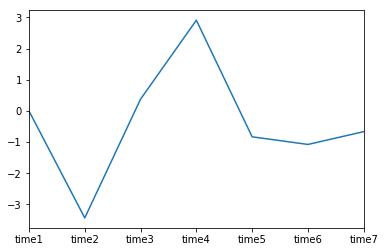

Cluster 12 number of entries 1


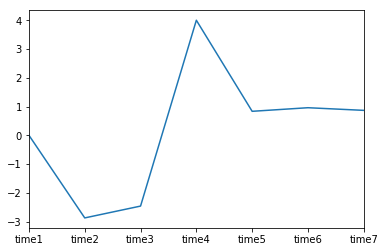

Cluster 7 number of entries 1


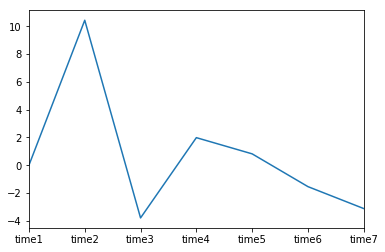

In [24]:
s = pd.Series(stirling_hac.labels_)
clusters = s.unique()
for c in clusters:
    cluster_indices = s[s==c].index
    print("Cluster %d number of entries %d" % (c, len(cluster_indices)))
    stirling_df.T.iloc[:, cluster_indices].plot(legend = False)
    plt.show()

Cluster 13 number of entries 112


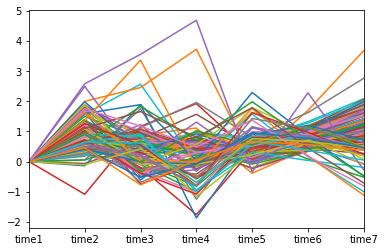

Cluster 11 number of entries 45


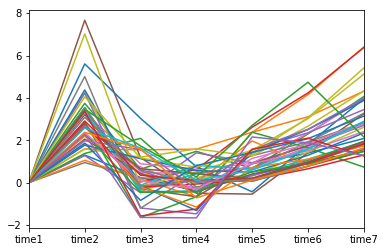

Cluster 6 number of entries 434


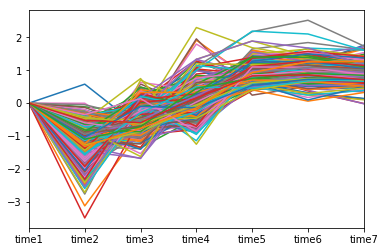

Cluster 5 number of entries 1169


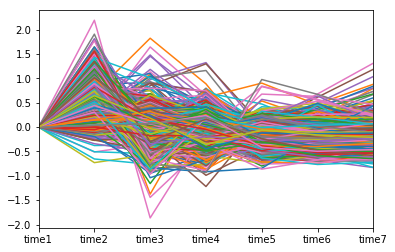

Cluster 0 number of entries 1318


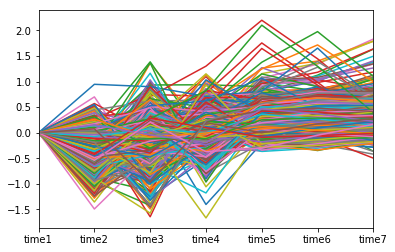

Cluster 7 number of entries 55


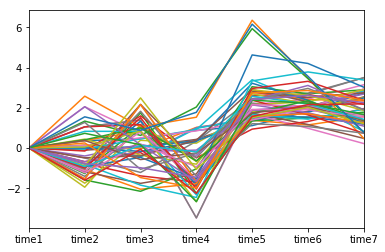

Cluster 3 number of entries 206


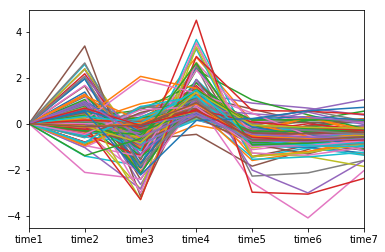

Cluster 1 number of entries 140


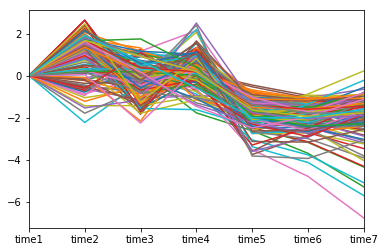

Cluster 10 number of entries 642


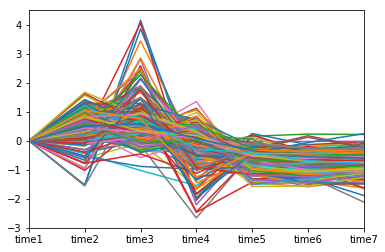

Cluster 2 number of entries 76


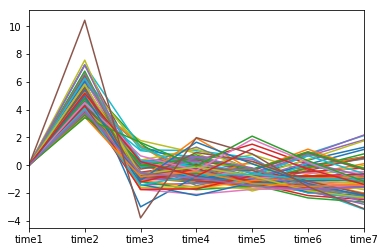

Cluster 15 number of entries 189


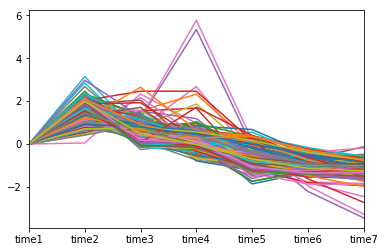

Cluster 17 number of entries 280


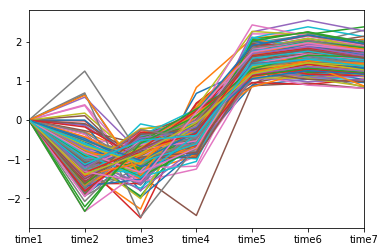

Cluster 8 number of entries 719


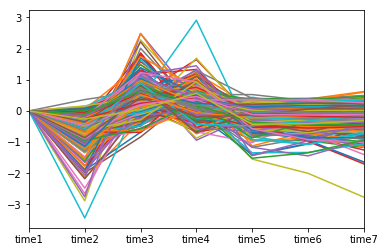

Cluster 9 number of entries 273


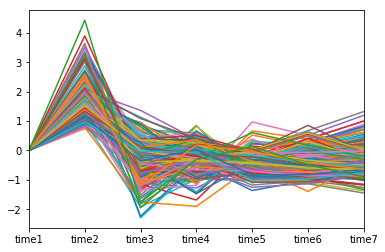

Cluster 12 number of entries 167


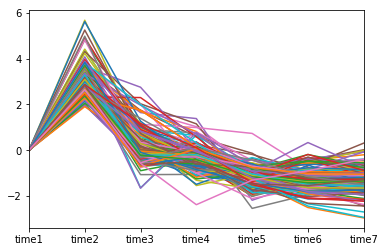

Cluster 4 number of entries 69


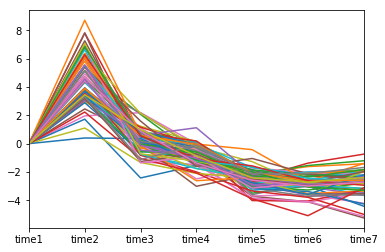

Cluster 14 number of entries 111


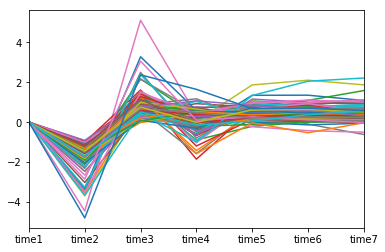

Cluster 16 number of entries 144


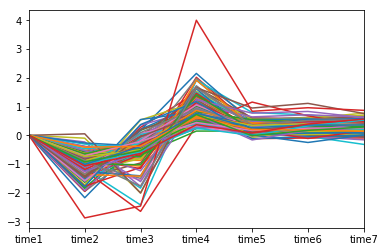

In [25]:
hac = AgglomerativeClustering(n_clusters=18, 
                                      linkage = 'ward',
                                      affinity = 'euclidean')
stirling_hac = hac.fit(stirling_df.values)

s = pd.Series(stirling_hac.labels_)
clusters = s.unique()
for c in clusters:
    cluster_indices = s[s==c].index
    print("Cluster %d number of entries %d" % (c, len(cluster_indices)))
    stirling_df.T.iloc[:, cluster_indices].plot(legend = False)
    plt.show()

Cluster 0 number of entries 60


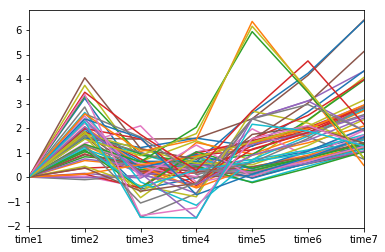

Cluster 6 number of entries 1276


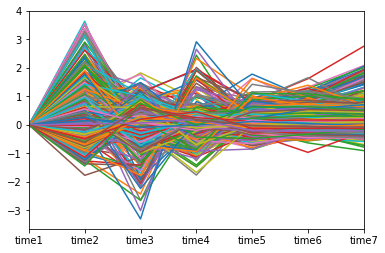

Cluster 2 number of entries 2089


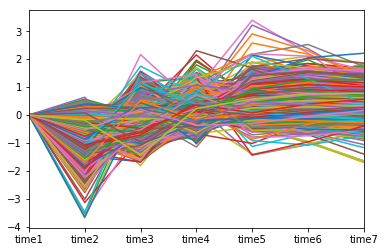

Cluster 3 number of entries 470


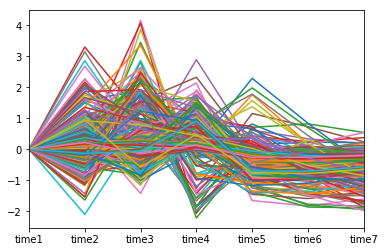

Cluster 1 number of entries 1745


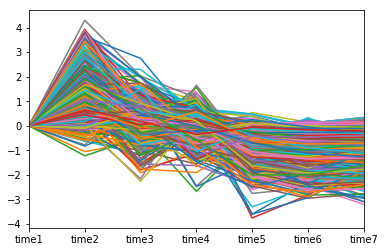

Cluster 4 number of entries 183


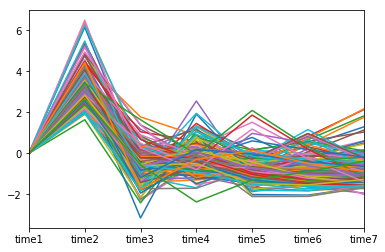

Cluster 5 number of entries 164


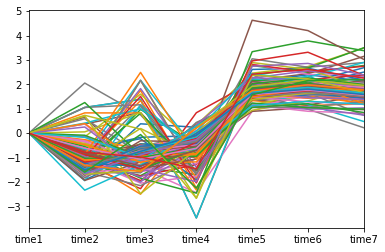

Cluster 7 number of entries 38


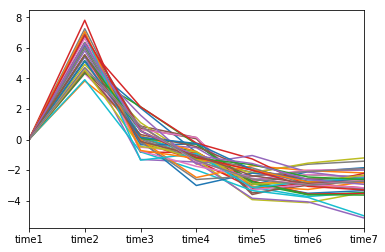

Cluster 14 number of entries 48


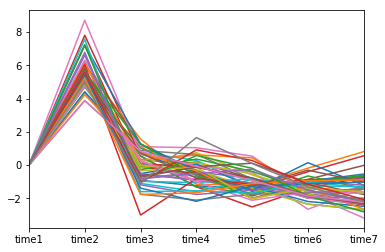

Cluster 15 number of entries 12


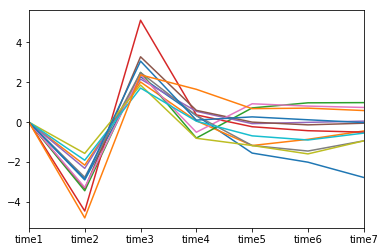

Cluster 10 number of entries 24


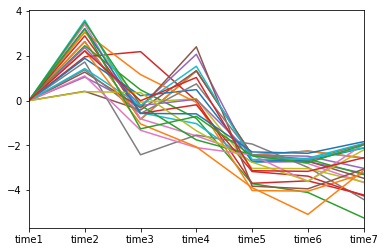

Cluster 16 number of entries 9


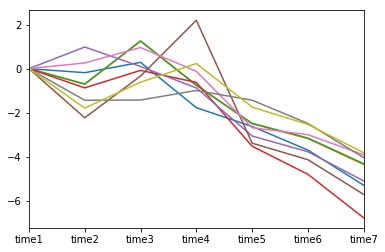

Cluster 12 number of entries 9


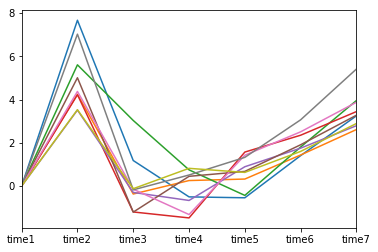

Cluster 13 number of entries 9


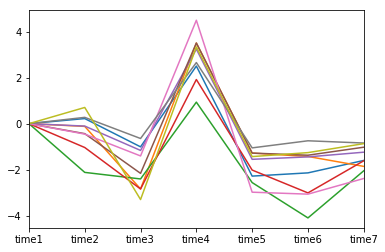

Cluster 11 number of entries 4


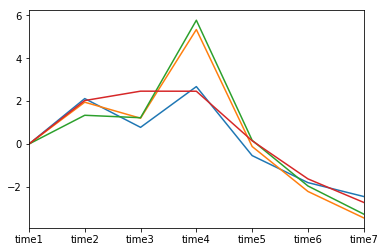

Cluster 17 number of entries 2


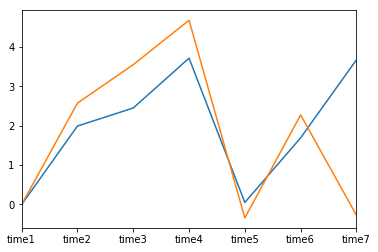

Cluster 8 number of entries 6


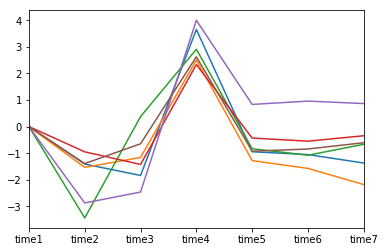

Cluster 9 number of entries 1


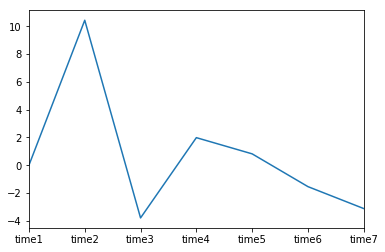

In [26]:
hac = AgglomerativeClustering(n_clusters=18, 
                                      linkage = 'complete',
                                      affinity = 'euclidean')
stirling_hac = hac.fit(stirling_df.values)

s = pd.Series(stirling_hac.labels_)
clusters = s.unique()
for c in clusters:
    cluster_indices = s[s==c].index
    print("Cluster %d number of entries %d" % (c, len(cluster_indices)))
    stirling_df.T.iloc[:, cluster_indices].plot(legend = False)
    plt.show()

In [30]:
stirling_df.iloc[:,1:].values


array([[ 1.74183953, -0.49504706, -0.0299989 ,  0.61027547,  1.06704273,
         1.64586509],
       [ 1.29945155,  0.23684755, -0.40439441,  0.89156158,  1.39742814,
         2.08160702],
       [ 0.62410281,  0.43414899,  0.98464788,  0.54316127,  1.18967651,
         1.944824  ],
       ..., 
       [ 0.95841463, -0.57411863,  0.48457427, -0.75229461, -0.78143853,
        -0.64846596],
       [-0.12977466, -0.06771792,  0.90723084, -0.70561687, -0.70664722,
        -0.56614205],
       [-0.18454333, -1.42211553,  0.23303551,  0.56963348,  0.77063095,
         0.77730273]])

In [9]:
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

# Elbow Curve For KMeans

In [45]:
def plot_elbow(gene_df, k_max, gene_type):
    distortions = []
    k_range = range(2,k_max)
    for k in k_range:
        kmeans = KMeans(n_clusters = k)
        kmeans.fit(gene_df.iloc[:,1:].values)
        distortions.append(kmeans.inertia_)
    stirling_kmeans_fig = plt.figure(figsize=(20,10))
    plt.rc('text', usetex = True)
    plt.rc('font', family = 'serif')
    plt.plot(k_range, distortions, marker = 'o')

    plt.xlabel(r'\textbf{Number of clusters} $K$', fontsize = 25)
    plt.xticks(fontsize = 25)
    plt.ylabel(r'$W_k$', fontsize = 25)
    plt.yticks(fontsize= 25)
    plt.grid(True)
    plt.title('Elbow curve'+' for '+gene_type, fontsize = 35)
    plt.show()

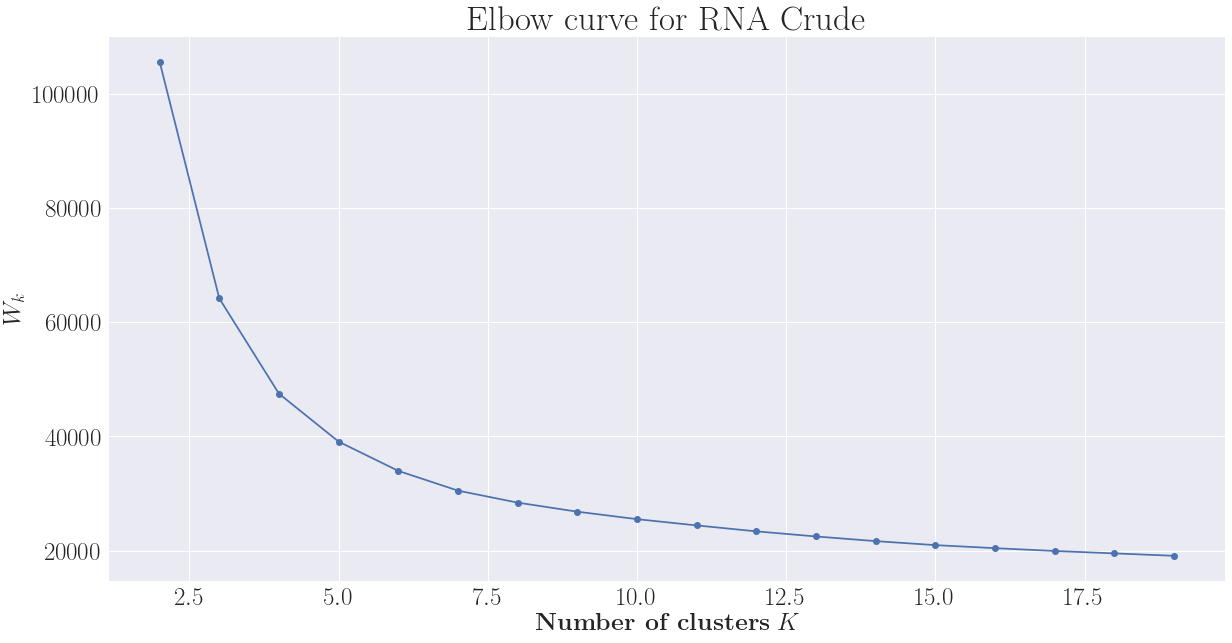

In [46]:
plot_elbow(rna_cru_df, 20, 'RNA Crude')


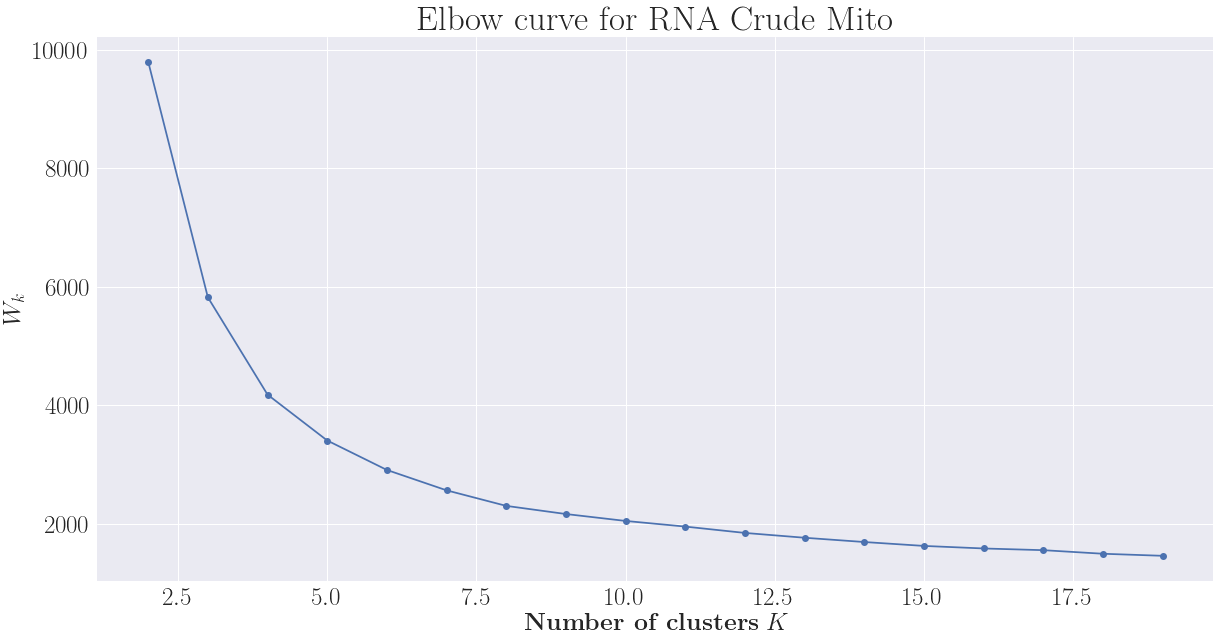

In [47]:
plot_elbow(rna_cru_mito_df, 20, 'RNA Crude Mito')

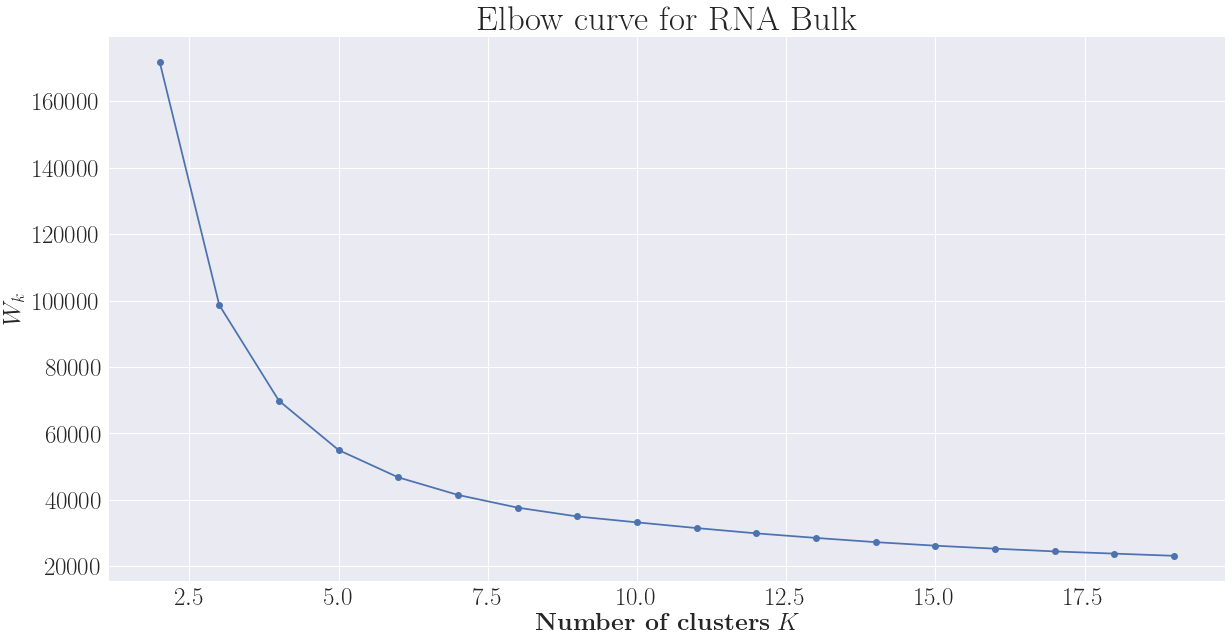

In [48]:
plot_elbow(rna_tot_df, 20, 'RNA Bulk')

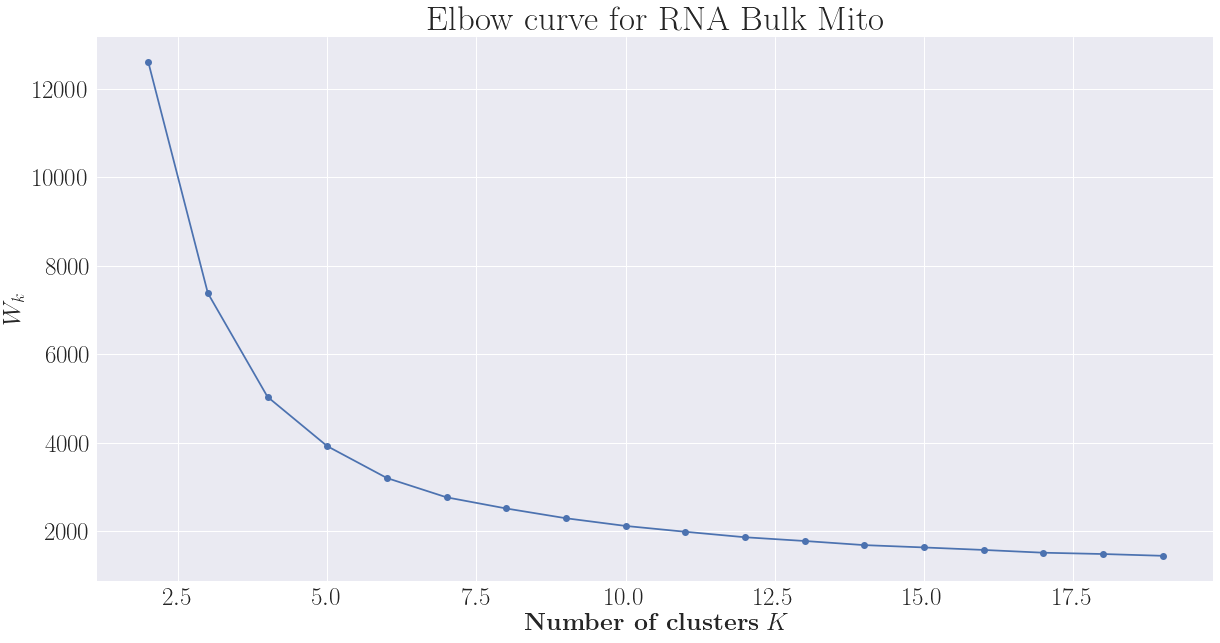

In [49]:
plot_elbow(rna_tot_mito_df, 20, 'RNA Bulk Mito')

# Gap Stats for KMeans

In [50]:
def optimalK(data, nrefs, maxClusters):
    '''
    Calculate KMeans optimal k using Gap statistic from Tibshiarni, Walther, Hastie Params:
        data:ndarry of shape (n_samples, n_features)
        nrefs: no of sample reference datasets to create
        maxClusters: maximum no of clusters to test for
    Returns: (gaps, optimalK)
    '''
    gaps = np.zeros((len(range(1,maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
        #Holder for reference for dispersion results
        refDisps = np.zeros(nrefs)
        
        #for n references, generate random sample and perfrm kmeans getting resulting dispersion for each loop
        for i in range(nrefs):
            #create new random reference set
            randomReference = np.random.random_sample(size = data.shape)
            
            #Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
        
        #Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
        
        #Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        
        #assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        #calc sd
        sd_k = (1/nrefs*)
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index = True)
    
    return (gaps.argmax()+1, resultsdf) #Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal


In [51]:
k, gapdf = optimalK(rna_cru_df.values, nrefs = 5, maxClusters=30)
print('optimal k is: ', k)
k, gapdf = optimalK(rna_cru_mito_df.values, nrefs = 5, maxClusters=30)
print('optimal k is: ', k)
k, gapdf = optimalK(rna_tot_df.values, nrefs = 5, maxClusters=30)
print('optimal k is: ', k)
k, gapdf = optimalK(rna_tot_mito_df.values, nrefs = 5, maxClusters=30)
print('optimal k is: ', k)

optimal k is:  28
optimal k is:  29
optimal k is:  28
optimal k is:  29


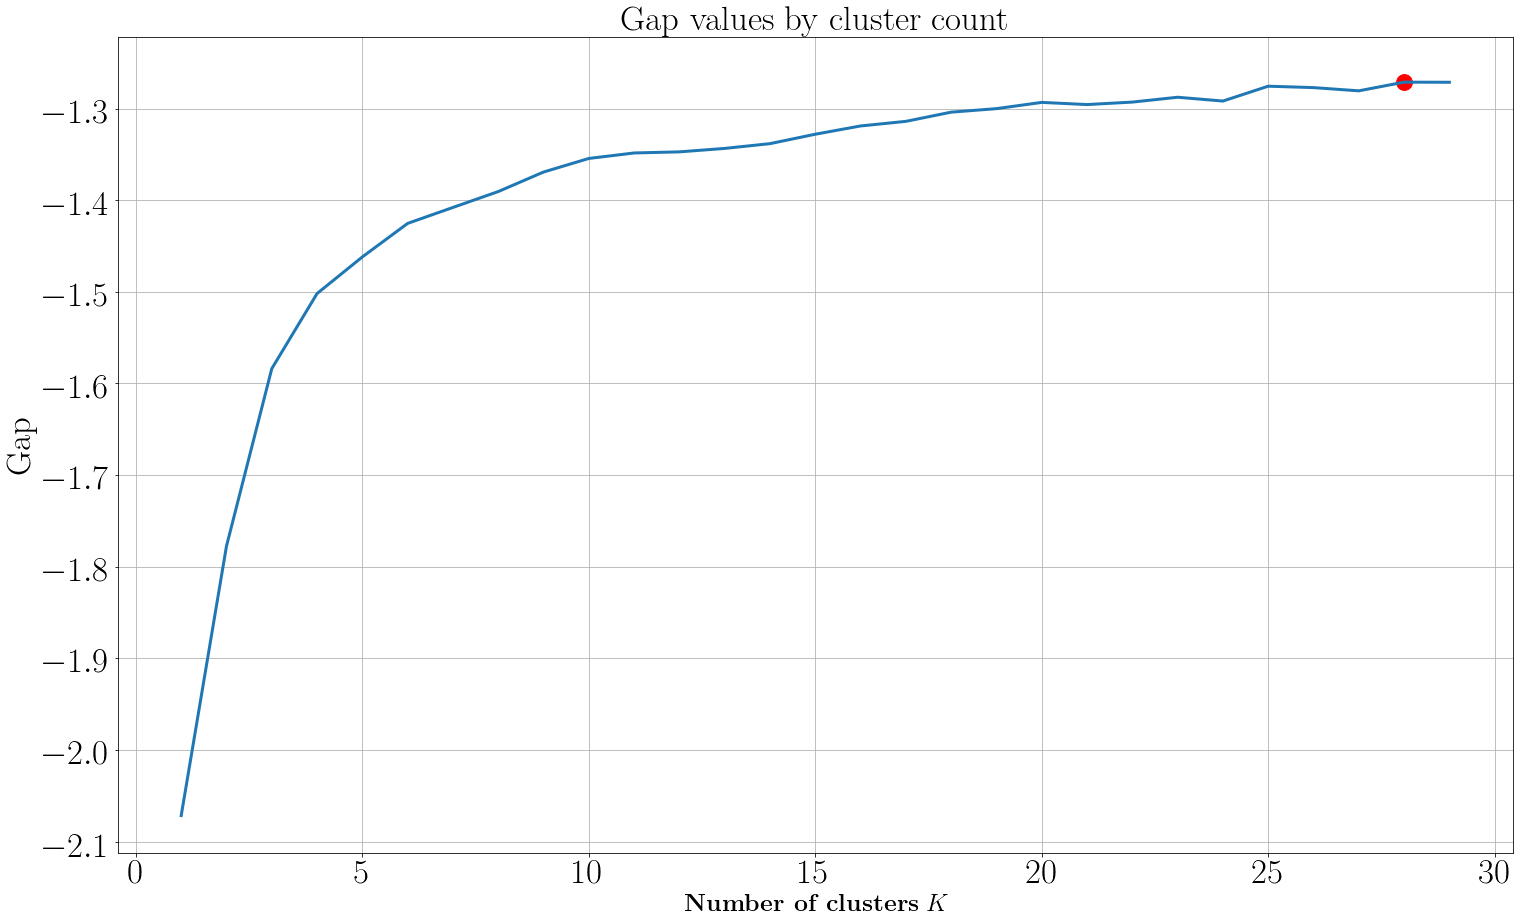

In [28]:
plt.figure(figsize=(25,15))

plt.plot(gapdf.clusterCount, gapdf.gap, linewidth = 3)
plt.scatter(gapdf[gapdf.clusterCount ==k].clusterCount, gapdf[gapdf.clusterCount==k].gap,s=250,c= 'r')


plt.xlabel(r'\textbf{Number of clusters} $K$', fontsize = 25)
plt.xticks(fontsize = 35)
plt.ylabel(r'Gap', fontsize = 35)
plt.yticks(fontsize= 35)
plt.grid(True)
plt.title('Gap values by cluster count', fontsize = 35)
plt.savefig('/Users/indrikwijaya/Desktop/fyp/2nd_presentation/gap_stats.png')
plt.show()

# Use log value


In [52]:
def convert_to_logdiff0(gene_df):
    gene_df_diff0 = gene_df
    gene_df_diff0['t6'] = gene_df_diff0['t6']-gene_df_diff0['t0']
    gene_df_diff0['t5'] = gene_df_diff0['t5']-gene_df_diff0['t0']
    gene_df_diff0['t4'] = gene_df_diff0['t4']-gene_df_diff0['t0']
    gene_df_diff0['t3'] = gene_df_diff0['t3']-gene_df_diff0['t0']
    gene_df_diff0['t2'] = gene_df_diff0['t2']-gene_df_diff0['t0']
    gene_df_diff0['t1'] = gene_df_diff0['t1']-gene_df_diff0['t0']    
    gene_df_diff0['t0'] = gene_df_diff0['t0']-gene_df_diff0['t0']
    
    return gene_df_diff0



In [53]:
rna_cru_df_diff0 = convert_to_logdiff0(rna_cru_df)
rna_cru_df_diff0.to_csv('/Users/indrikwijaya/Desktop/rna_logrpkm/rna_cru_diff0.txt', header = True, sep = '\t')

rna_cru_mito_df_diff0 = convert_to_logdiff0(rna_cru_mito_df)
rna_cru_mito_df_diff0.to_csv('/Users/indrikwijaya/Desktop/rna_logrpkm/rna_cru_mito_diff0.txt', header = True, sep = '\t')

rna_tot_df_diff0 = convert_to_logdiff0(rna_tot_df)
rna_tot_df_diff0.to_csv('/Users/indrikwijaya/Desktop/rna_logrpkm/rna_tot_diff0.txt', header = True, sep = '\t')

rna_tot_mito_df_diff0 = convert_to_logdiff0(rna_tot_mito_df)
rna_tot_mito_df_diff0.to_csv('/Users/indrikwijaya/Desktop/rna_logrpkm/rna_tot_mito_diff0.txt', header = True, sep = '\t')

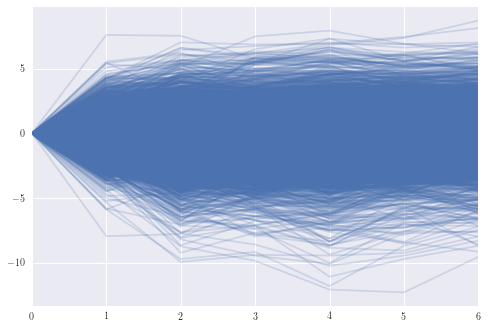

In [54]:
ax = None
ax = sns.tsplot(ax =ax, data = rna_cru_df_diff0.values, err_style = 'unit_traces')
plt.show()

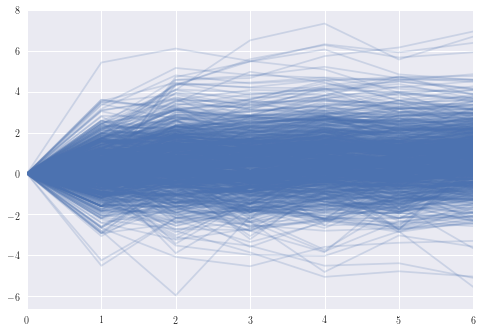

In [55]:
ax = None
ax = sns.tsplot(ax =ax, data = rna_cru_mito_df_diff0.values, err_style = 'unit_traces')
plt.show()

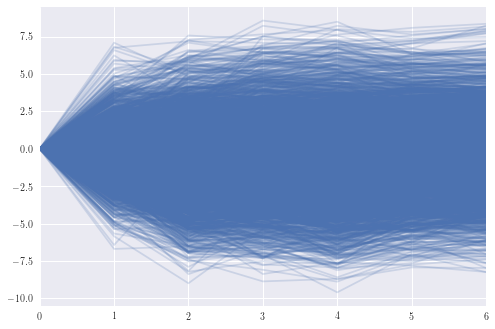

In [56]:
ax = None
ax = sns.tsplot(ax =ax, data = rna_tot_df_diff0.values, err_style = 'unit_traces')
plt.show()

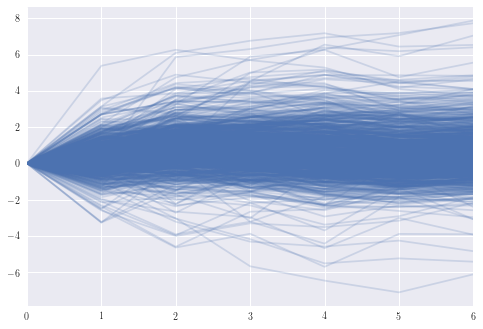

In [57]:
ax = None
ax = sns.tsplot(ax =ax, data = rna_tot_mito_df_diff0.values, err_style = 'unit_traces')
plt.show()

In [44]:
rna_cru_df_diff0.head()

t0        t1        t2        t3        t4        t5        t6
NM_008033  0.0 -0.946681 -1.014178 -1.030824 -1.057719 -1.883304 -0.990696
NM_016861  0.0 -1.728040 -2.858059 -4.015717 -3.652666 -3.546269 -2.778288
NM_177327  0.0 -0.598757 -1.014178  0.113566  0.476617  0.483479 -0.456360
NM_177326  0.0  1.348775  1.085357 -0.108827  0.527243  0.775659  0.945739
NM_177325  0.0  2.229062 -0.751144 -2.208362 -1.037956 -1.475880 -0.608363

In [45]:
rna_cru_df.head()

t0        t1        t2        t3        t4        t5        t6
NM_008033  0.0 -0.946681 -1.014178 -1.030824 -1.057719 -1.883304 -0.990696
NM_016861  0.0 -1.728040 -2.858059 -4.015717 -3.652666 -3.546269 -2.778288
NM_177327  0.0 -0.598757 -1.014178  0.113566  0.476617  0.483479 -0.456360
NM_177326  0.0  1.348775  1.085357 -0.108827  0.527243  0.775659  0.945739
NM_177325  0.0  2.229062 -0.751144 -2.208362 -1.037956 -1.475880 -0.608363

In [64]:
print('bic_rna_cru')
bic_rna_cru = bic_gmm(rna_cru_df_diff0)
print(bic_rna_cru)

print('bic_rna_cru_mito')
bic_rna_cru_mito = bic_gmm(rna_cru_mito_df_diff0)
print(bic_rna_cru_mito)

print('bic_rna_tot')
bic_rna_tot = bic_gmm(rna_tot_df_diff0)
print(bic_rna_tot)

print('bic_rna_tot_mito')
bic_rna_tot_mito = bic_gmm(rna_tot_mito_df_diff0)
print(bic_rna_tot_mito)

bic_rna_cru
GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=4, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)
[ 221320.635269    192191.91411911  169583.14867485  155716.34233357
  147193.8849182   142808.20568081  140512.40278815  138735.81112099
  136175.19324822  134916.68955814  133931.36775802  133218.79635793
  132669.14203454  131514.710833    131132.90556007  130394.06785712
  130572.75568176  129992.5283053   129441.8565031   129626.53976924
   20356.52032723   20466.59227032   18961.79636976   19443.65446547
   17771.09065101   17786.39953366   18136.33244967   18227.17574069
   17466.47582502   17179.2881471    17237.33465598   17320.1523467
   17119.54093435   17317.03690359   17099.92377013   17242.31401124
   16797.90393308   16496.89956343   16163.4580314    16636.04998236
   92600.94874882 

In [65]:
print('aic_rna_cru')
aic_rna_cru = aic_gmm(rna_cru_df_diff0)
print(aic_rna_cru)

print('aic_rna_cru_mito')
aic_rna_cru_mito = aic_gmm(rna_cru_mito_df_diff0)
print(aic_rna_cru_mito)

print('aic_rna_tot')
aic_rna_tot = aic_gmm(rna_tot_df_diff0)
print(aic_rna_tot)

print('aic_rna_tot_mito')
aic_rna_tot_mito = aic_gmm(rna_tot_mito_df_diff0)
print(aic_rna_tot_mito)

aic_rna_cru
GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=10, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)
[ 221264.08966416  192071.75470883  169399.37545912  155468.9553124
  146882.88409159  142433.59104876  140074.17435065  138233.96887805
  135609.73719984  134287.61970431  133238.68409874  132462.49889322
  131849.23076438  130631.1857574   130185.76667902  129383.31517064
  129498.38918983  128854.54800792  128240.26240028  128361.33186097
   20109.13330606   20162.65964431   18601.31813891   19026.63062979
   17297.52121049   17256.2844883    17549.67179947   17583.96948565
   16766.72396514   16422.99068238   16424.49158643   16450.76367231
   16193.60665511   16334.55701952   16060.89828122   16146.74291749
   15645.7872345    15288.23726      14898.25012314   15314.29646926
   92501.99394035

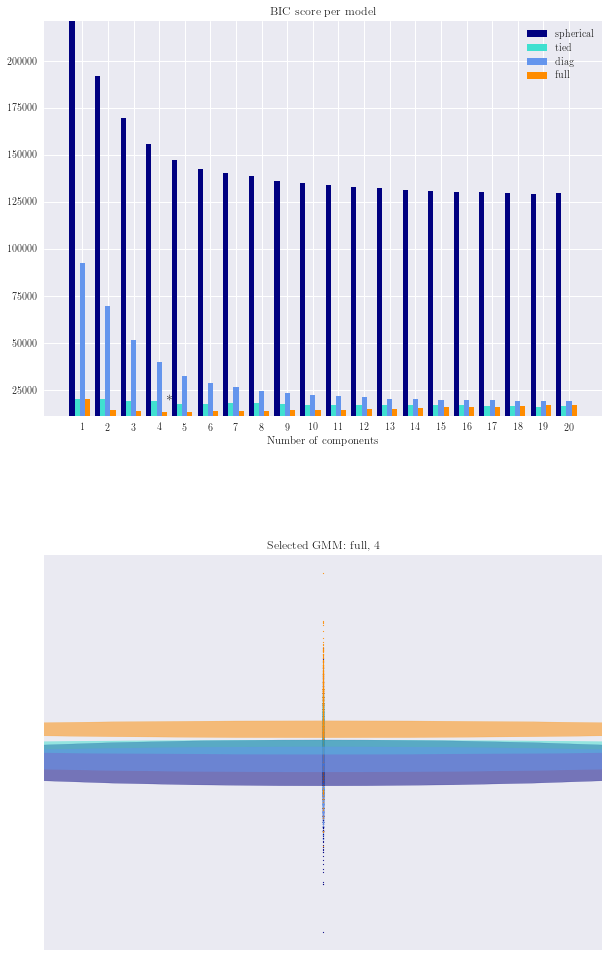

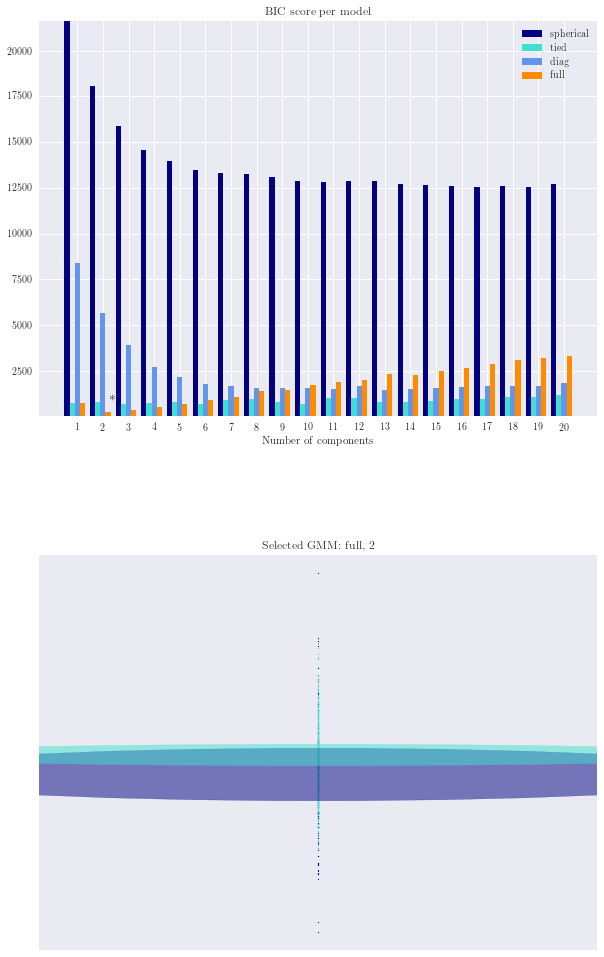

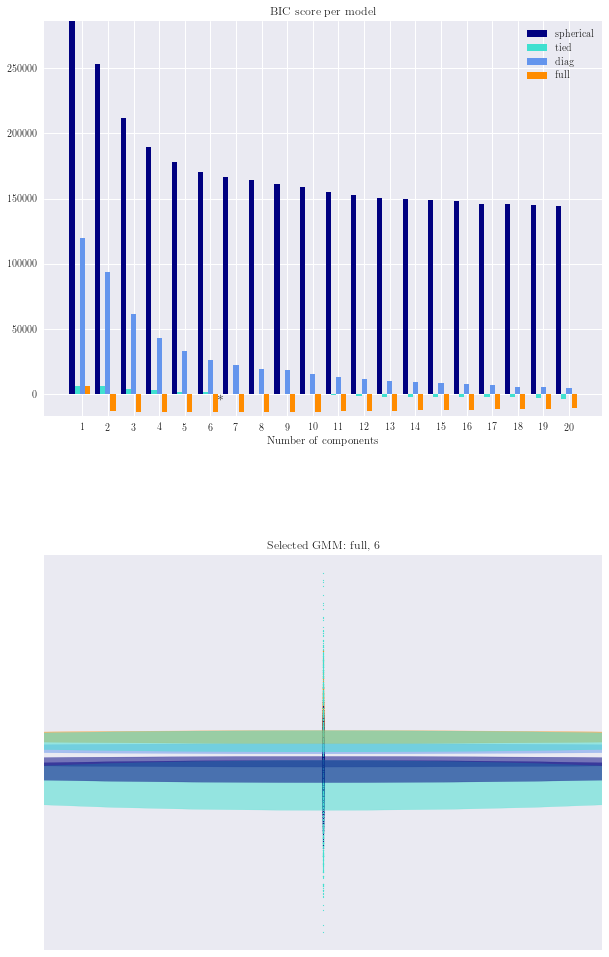

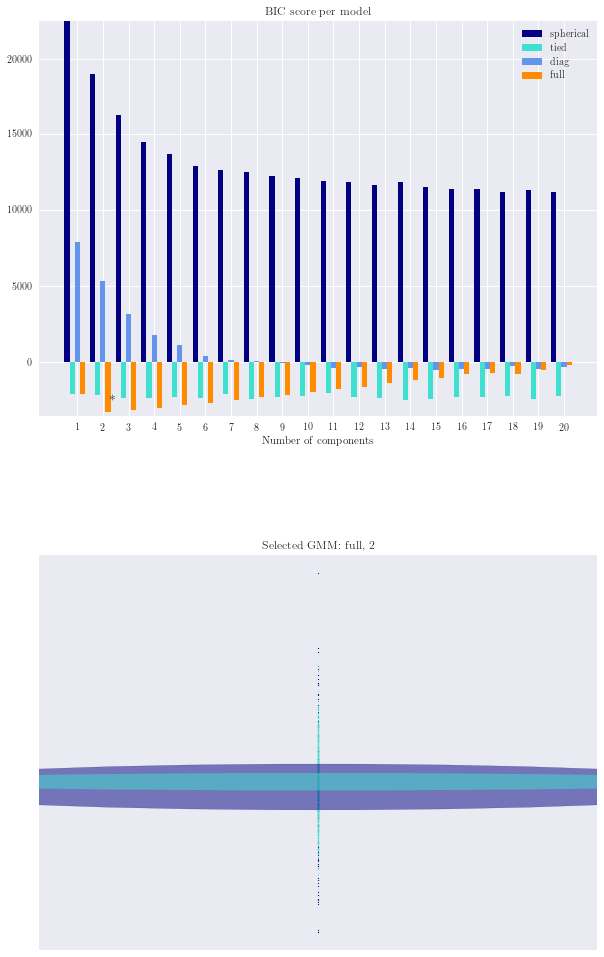

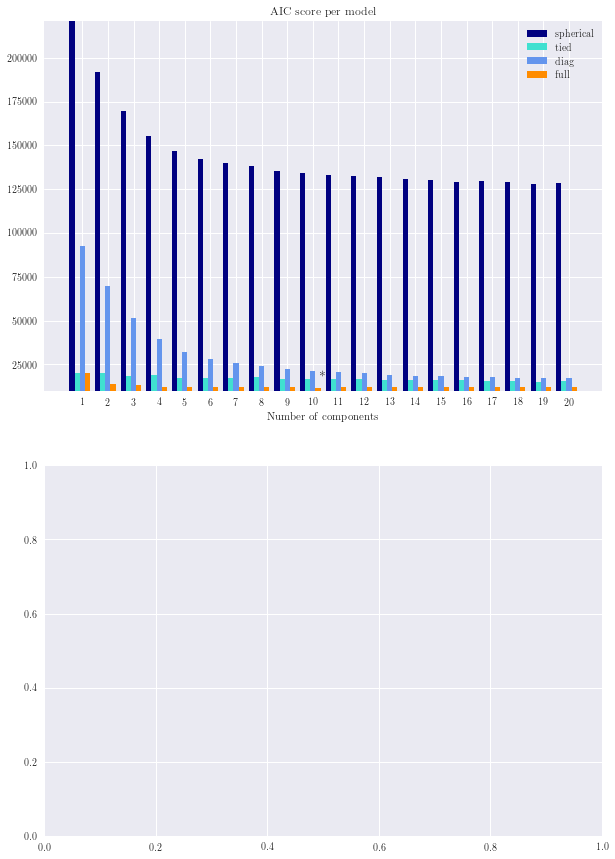

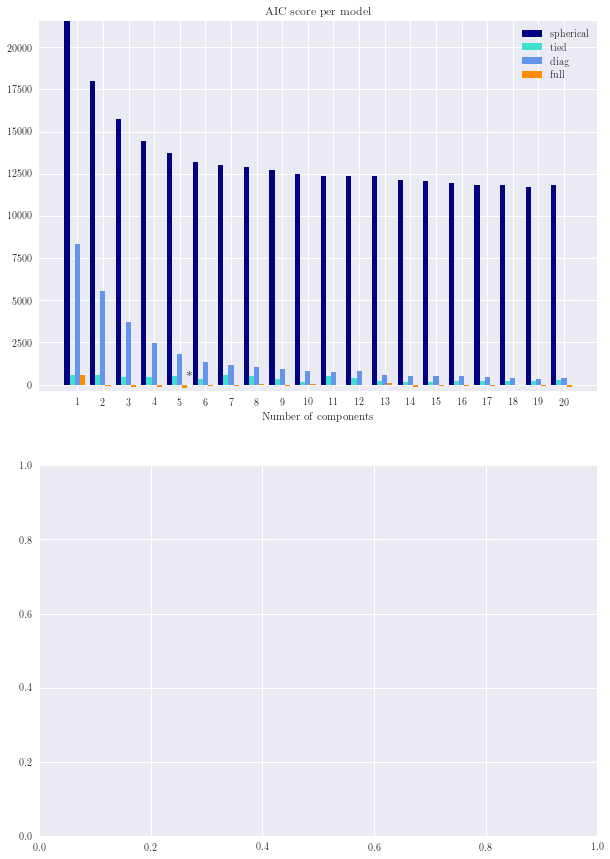

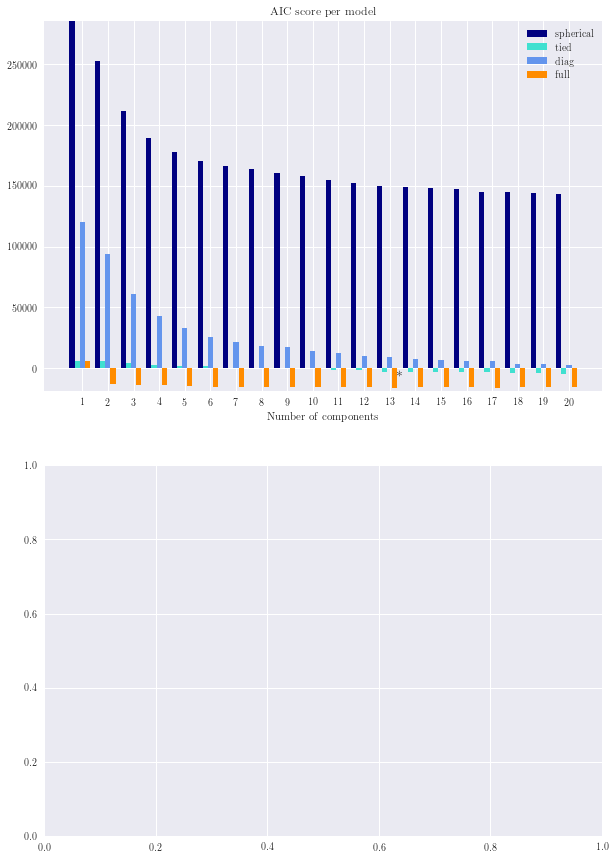

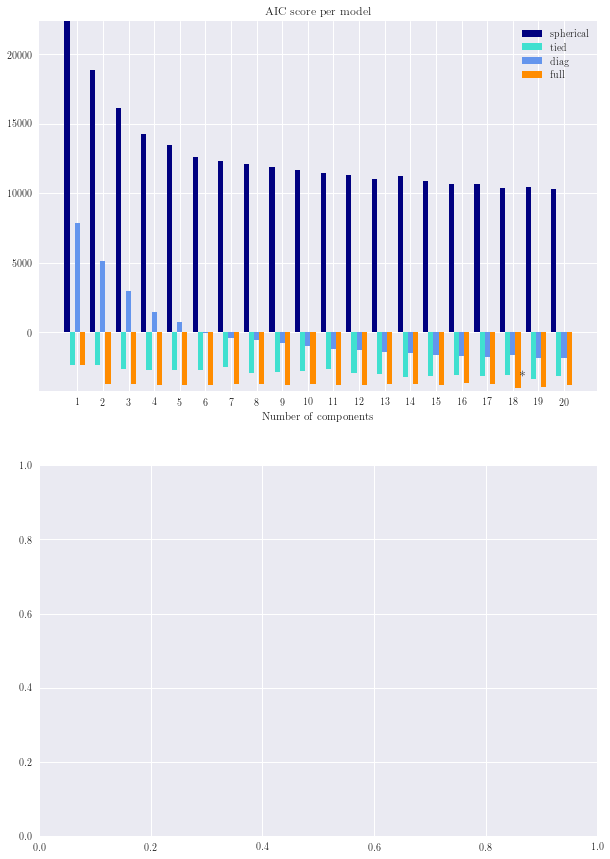

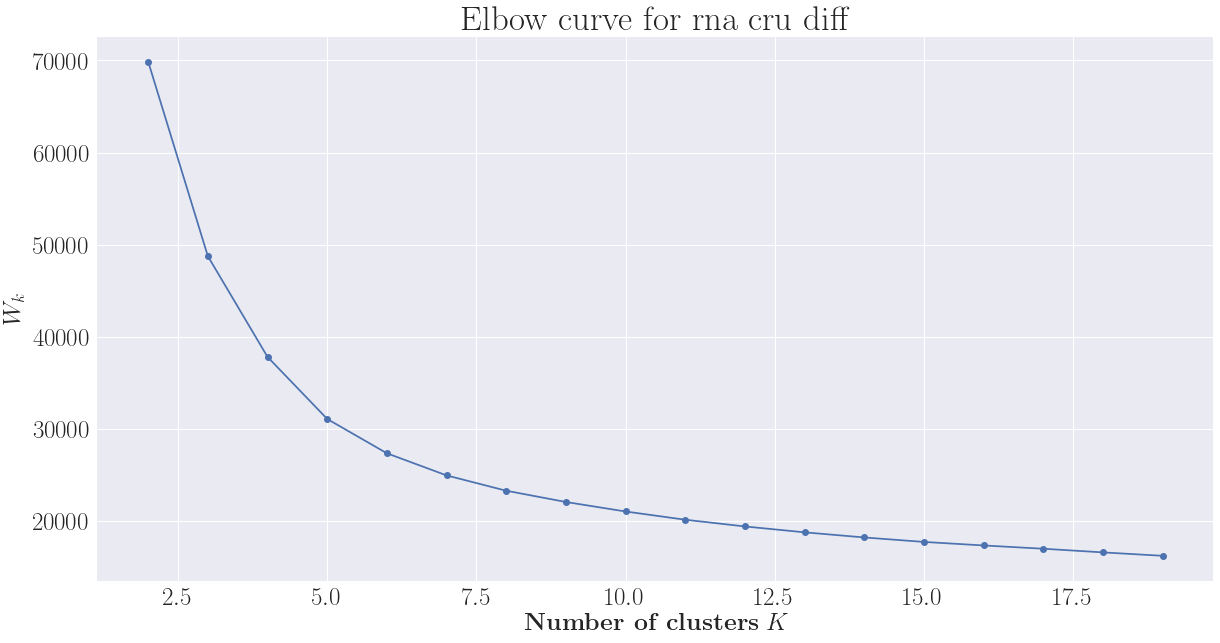

In [60]:
plot_elbow(rna_cru_df_diff0, 20, 'rna cru diff')

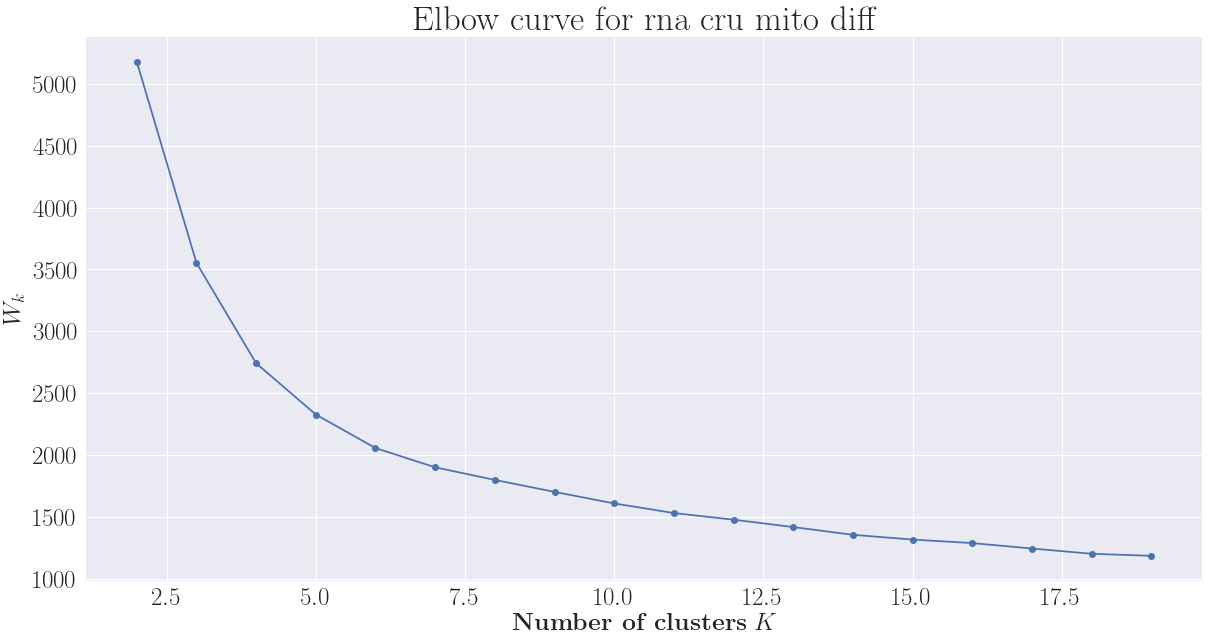

In [61]:
plot_elbow(rna_cru_mito_df_diff0, 20, 'rna cru mito diff')

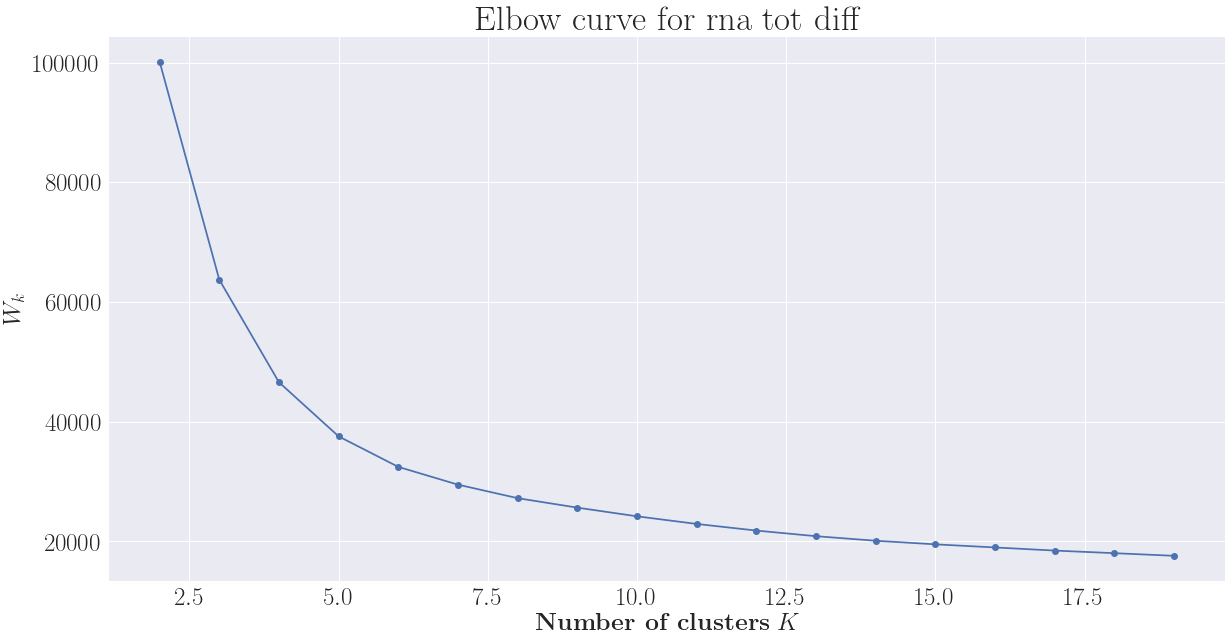

In [62]:
plot_elbow(rna_tot_df_diff0, 20, 'rna tot diff')

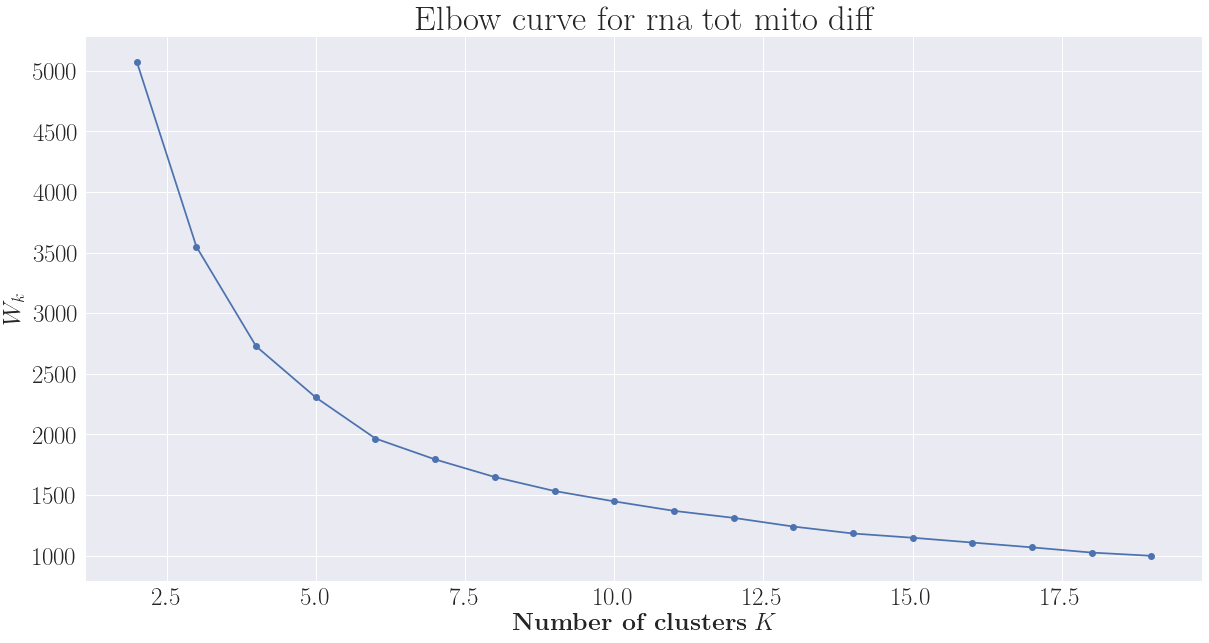

In [63]:
plot_elbow(rna_tot_mito_df_diff0, 20, 'rna tot mito diff')

In [30]:
import random

def find_centers(X, K):
    # Initialize to K random centers
    oldmu = random.sample(X, K)
    mu = random.sample(X, K)
    while not has_converged(mu, oldmu):
        oldmu = mu
        # Assign all points in X to clusters
        clusters = cluster_points(X, mu)
        # Reevaluate centers
        mu = reevaluate_centers(oldmu, clusters)
    return(mu, clusters)

def Wk(mu, clusters):
    K = len(mu)
    return sum([np.linalg.norm(mu[i]-c)**2/(2*len(c)) for i in range(K) for c in clusters[i]])


def bounding_box(X):
    xmin, xmax = min(X,key=lambda a:a[0])[0], max(X,key=lambda a:a[0])[0]
    ymin, ymax = min(X,key=lambda a:a[1])[1], max(X,key=lambda a:a[1])[1]
    return (xmin,xmax), (ymin,ymax)
 
def gap_statistic(X):
    (xmin,xmax), (ymin,ymax) = bounding_box(X)
    # Dispersion for real distribution
    ks = range(1,21)
    Wks = np.zeros(len(ks))
    Wkbs = np.zeros(len(ks))
    sk = np.zeros(len(ks))
    for indk, k in enumerate(ks):
        mu, clusters = find_centers(X,k)
        Wks[indk] = np.log(Wk(mu, clusters))
        # Create B reference datasets
        B = 10
        BWkbs = zeros(B)
        for i in range(B):
            Xb = []
            for n in range(len(X)):
                Xb.append([random.uniform(xmin,xmax),
                          random.uniform(ymin,ymax)])
            Xb = np.array(Xb)
            mu, clusters = find_centers(Xb,k)
            BWkbs[i] = np.log(Wk(mu, clusters))
        Wkbs[indk] = sum(BWkbs)/B
        sk[indk] = np.sqrt(sum((BWkbs-Wkbs[indk])**2)/B)
    sk = sk*np.sqrt(1+1/B)
    return(ks, Wks, Wkbs, sk)


In [32]:
def init_board_gauss(N, k):
    n = float(N)/k
    X = []
    for i in range(k):
        c = (random.uniform(-1, 1), random.uniform(-1, 1))
        s = random.uniform(0.05,0.5)
        x = []
        while len(x) < n:
            a, b = np.array([np.random.normal(c[0], s), np.random.normal(c[1], s)])
            # Continue drawing points from the distribution in the range [-1,1]
            if abs(a) < 1 and abs(b) < 1:
                x.append([a,b])
        X.extend(x)
    X = np.array(X)[:N]
    return X
init_board_gauss(100,3)

array([[ 0.36156996, -0.21320033],
       [-0.0445613 , -0.0014048 ],
       [-0.28332494,  0.1902682 ],
       [-0.34737218, -0.31893445],
       [ 0.24418847, -0.34890551],
       [ 0.27724599,  0.04558798],
       [ 0.28129676, -0.10984766],
       [ 0.75380115, -0.37941262],
       [ 0.39400944, -0.04888478],
       [ 0.23850459,  0.20819396],
       [ 0.09588947, -0.02782466],
       [ 0.07507102, -0.22816943],
       [-0.17411808,  0.04637335],
       [ 0.1929791 , -0.20633616],
       [ 0.50122896,  0.49265061],
       [ 0.55948268, -0.25365569],
       [-0.06833484, -0.38496514],
       [-0.07829634,  0.79280804],
       [-0.14637797, -0.15461418],
       [-0.31745499, -0.08256232],
       [ 0.73006931, -0.31788143],
       [ 0.77532908, -0.63259053],
       [ 0.06961466,  0.40698378],
       [-0.06114356, -0.21019351],
       [ 0.47961255,  0.07124589],
       [ 0.58939529, -0.31700596],
       [ 0.67483935,  0.07386832],
       [ 0.7396112 , -0.27096575],
       [-0.02170592,

In [74]:
bayesian_gmm=mixture.BayesianGaussianMixture(
        weight_concentration_prior_type="dirichlet_distribution",
        n_components=12, reg_covar=0.2, init_params='random',
        max_iter=1500, mean_precision_prior=.8,
        random_state=2)
bayesian_gmm.fit(rna_cru_mito_df.values)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
            degrees_of_freedom_prior=None, init_params='random',
            max_iter=1500, mean_precision_prior=0.8, mean_prior=None,
            n_components=12, n_init=1, random_state=2, reg_covar=0.2,
            tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
            weight_concentration_prior=None,
            weight_concentration_prior_type='dirichlet_distribution')

# Silhouette Analysis for KMeans

For n_clusters = 2 The average silhouette_score is : 0.334254627804


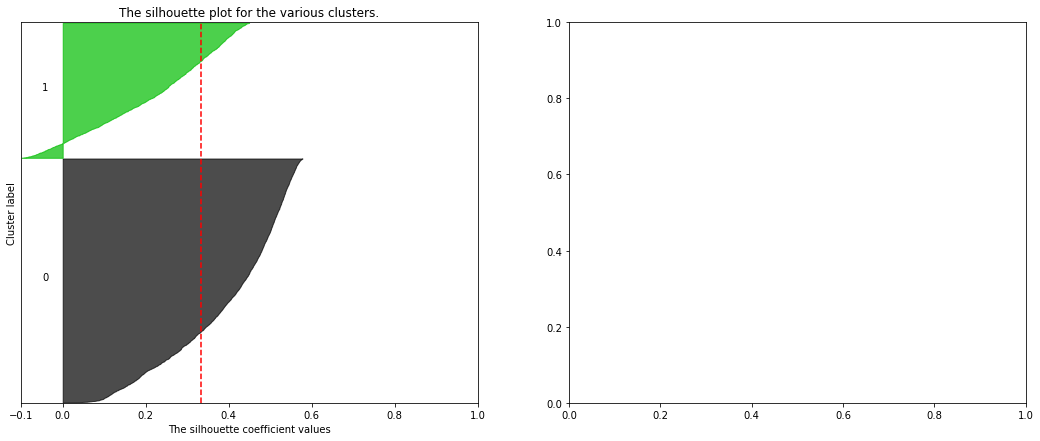

For n_clusters = 3 The average silhouette_score is : 0.32759429717


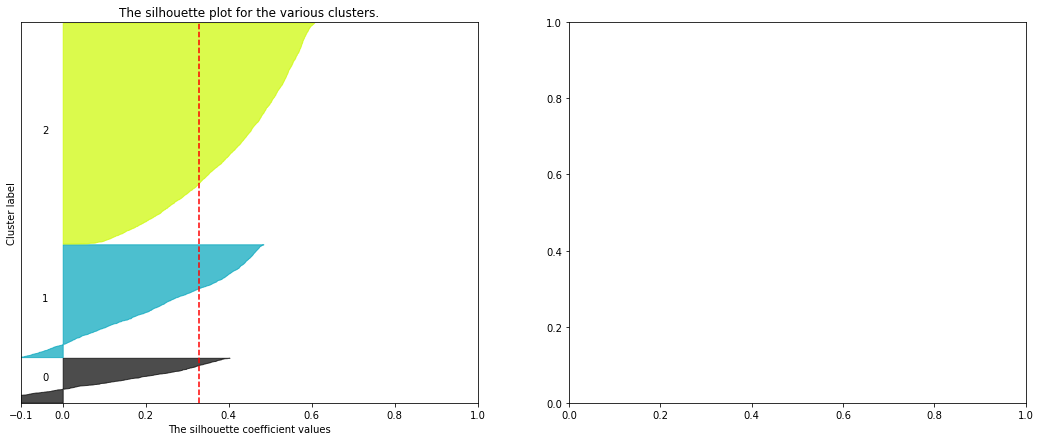

For n_clusters = 4 The average silhouette_score is : 0.26560304854


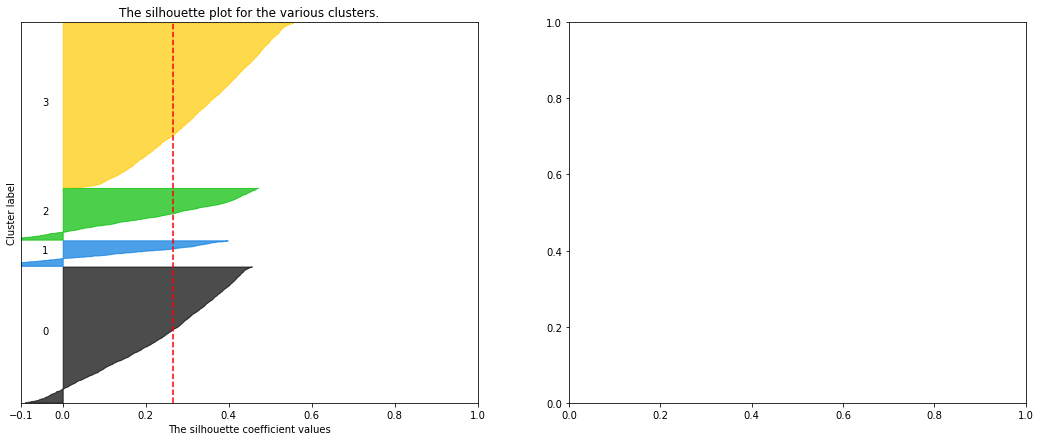

For n_clusters = 5 The average silhouette_score is : 0.243176508846


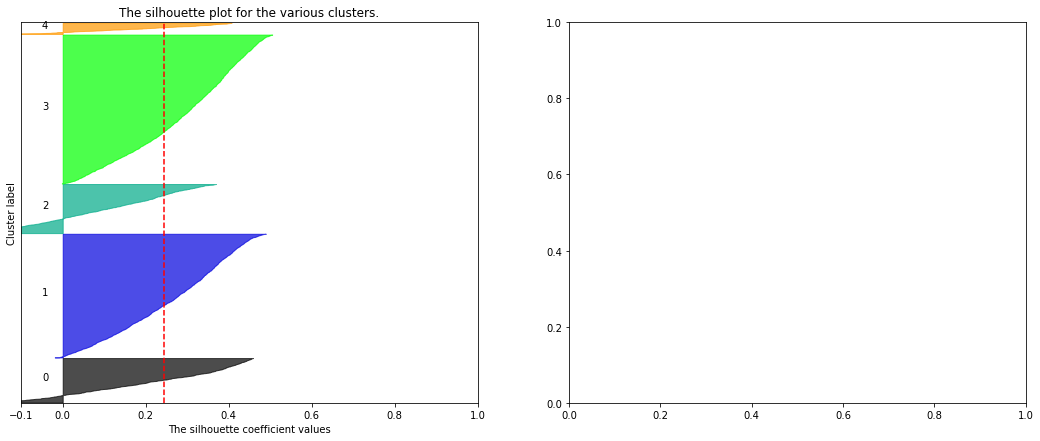

For n_clusters = 6 The average silhouette_score is : 0.251457826817


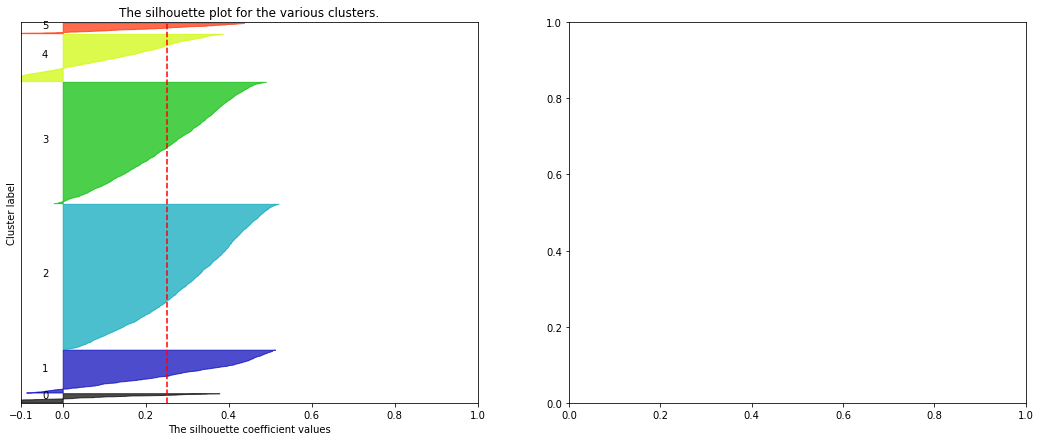

For n_clusters = 7 The average silhouette_score is : 0.244131268334


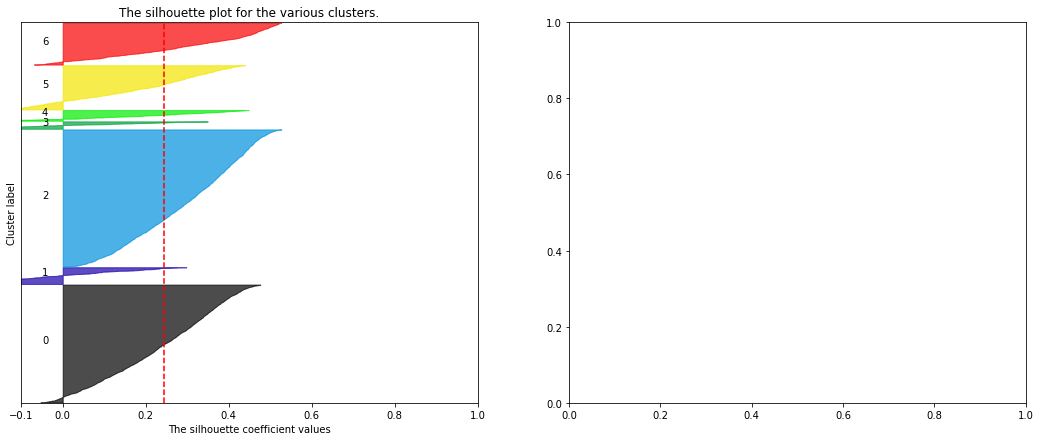

For n_clusters = 8 The average silhouette_score is : 0.229021532823


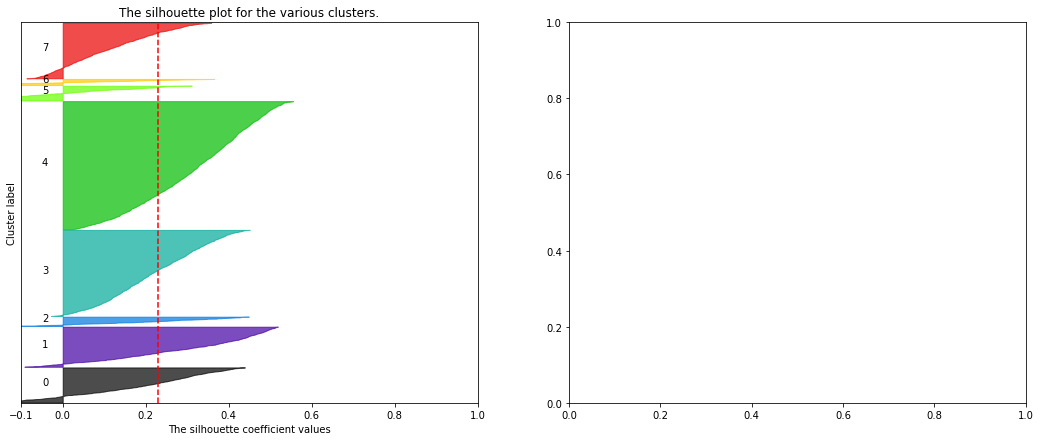

For n_clusters = 9 The average silhouette_score is : 0.189381583036


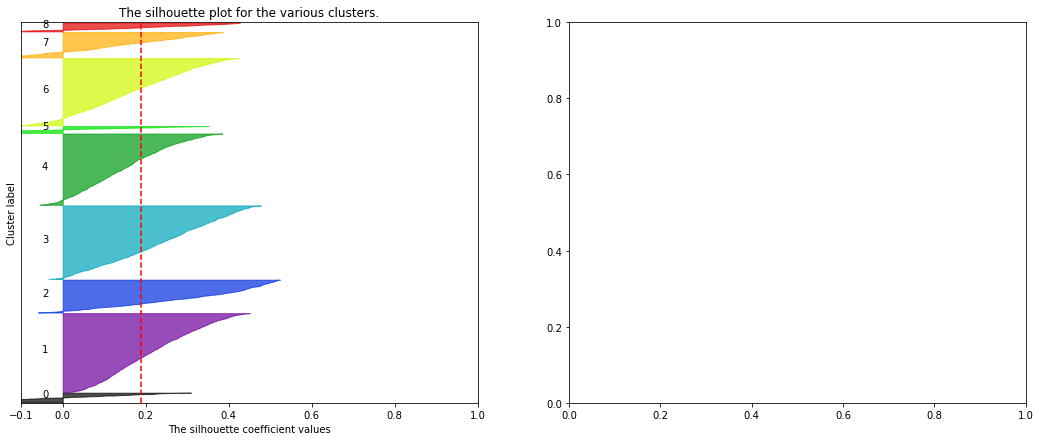

For n_clusters = 10 The average silhouette_score is : 0.201985572731


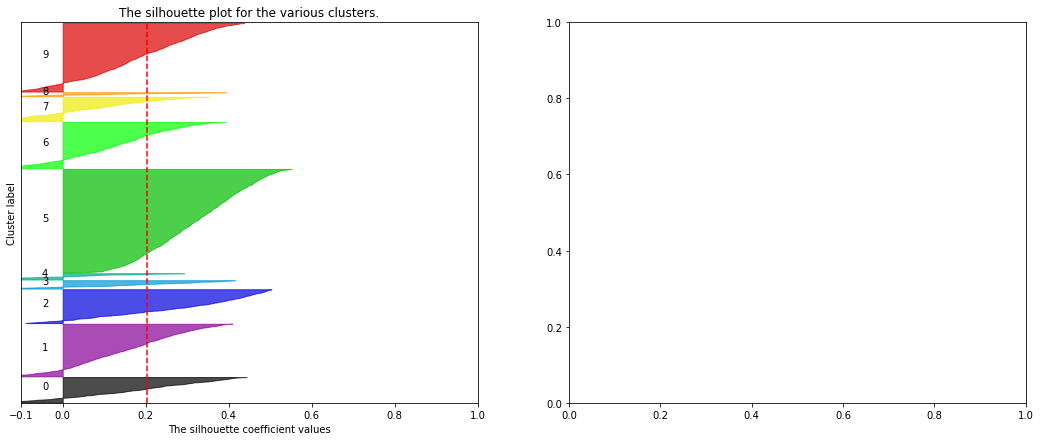

For n_clusters = 11 The average silhouette_score is : 0.183140501437


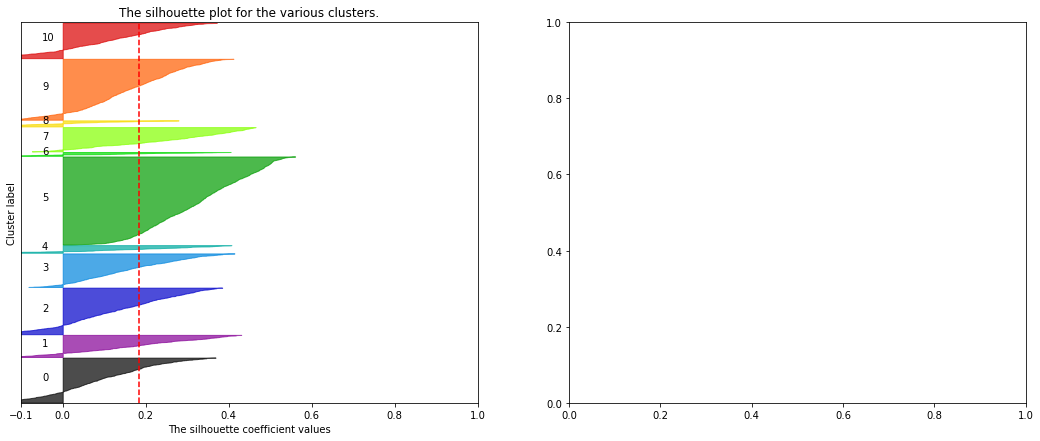

For n_clusters = 12 The average silhouette_score is : 0.187821078647


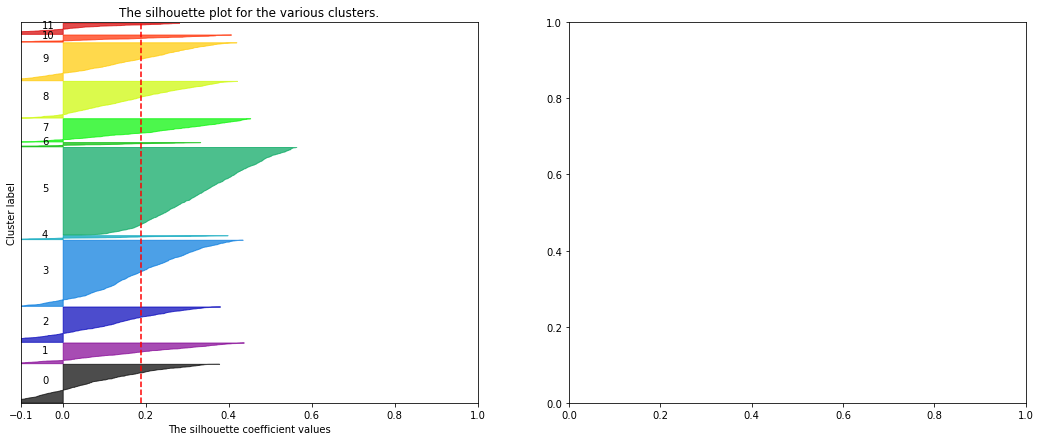

For n_clusters = 13 The average silhouette_score is : 0.185310249531


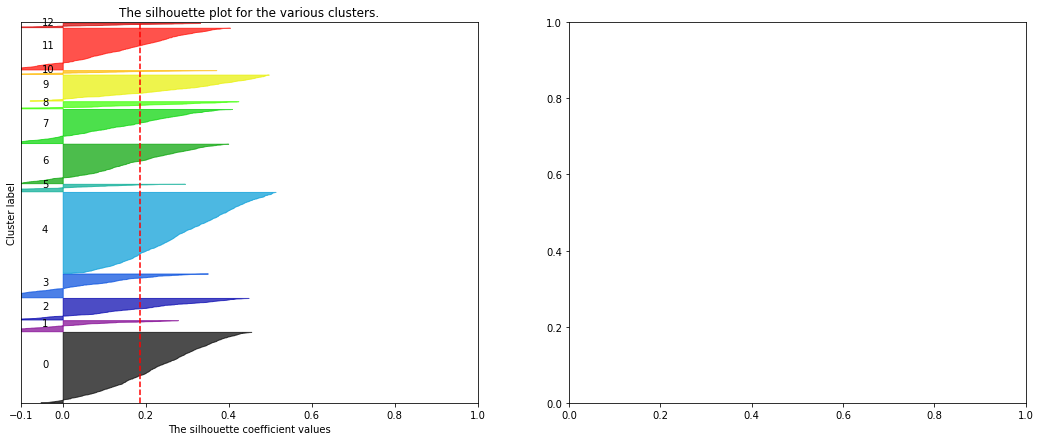

For n_clusters = 14 The average silhouette_score is : 0.185830212475


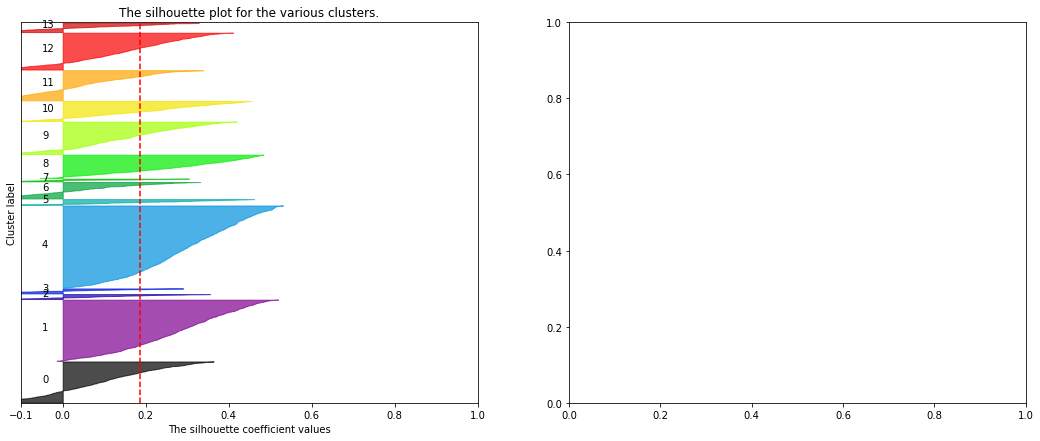

For n_clusters = 15 The average silhouette_score is : 0.180381368487


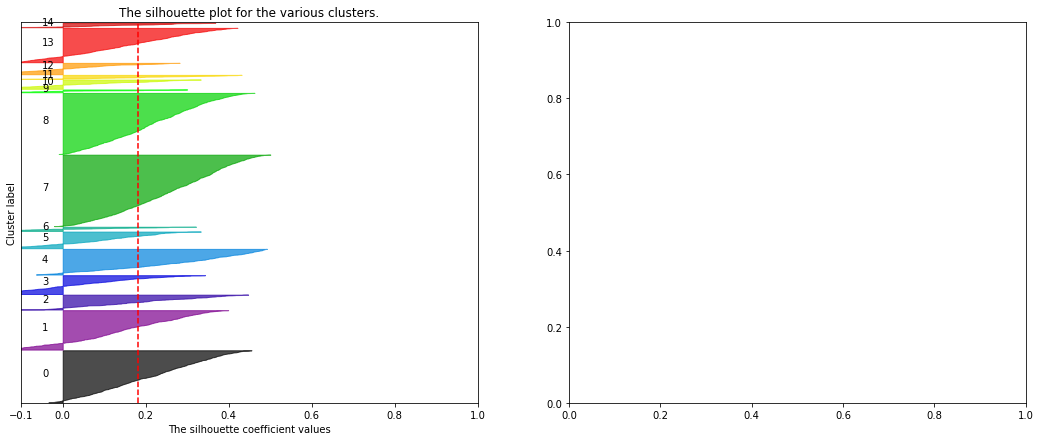

For n_clusters = 16 The average silhouette_score is : 0.181965106856


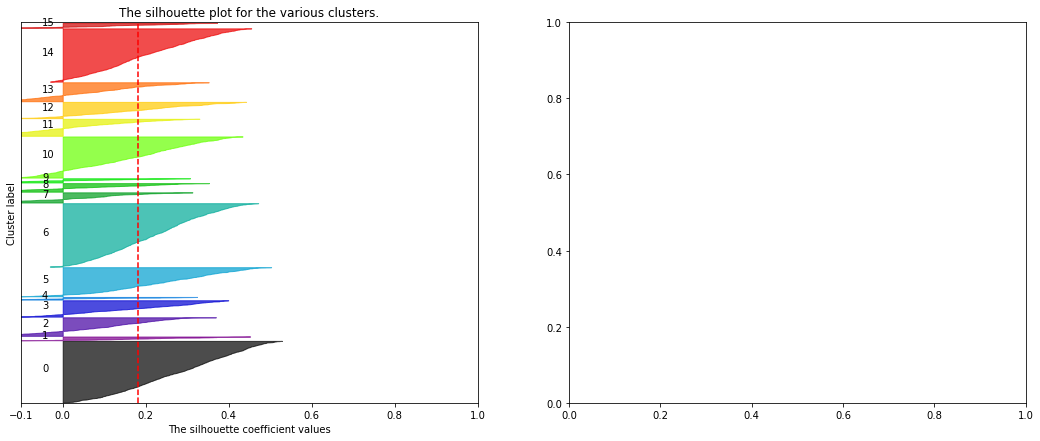

For n_clusters = 17 The average silhouette_score is : 0.1806803711


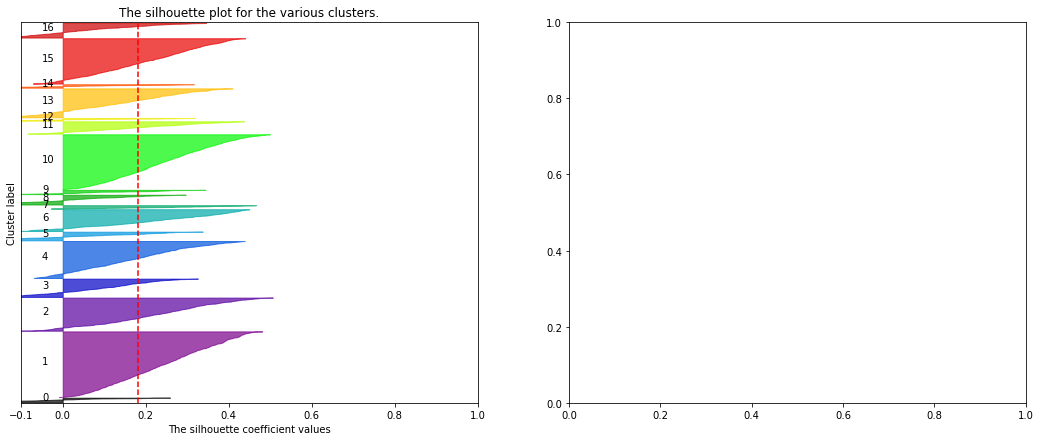

For n_clusters = 18 The average silhouette_score is : 0.175544406573


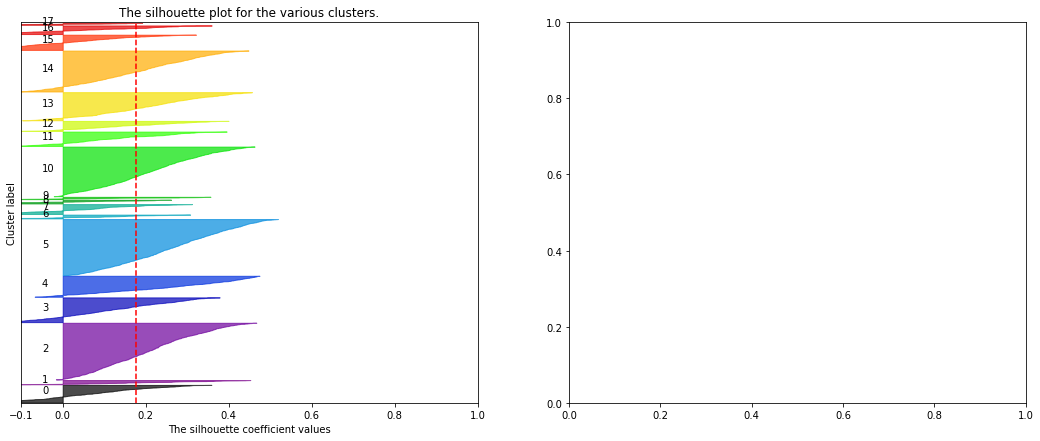

For n_clusters = 19 The average silhouette_score is : 0.180249227023


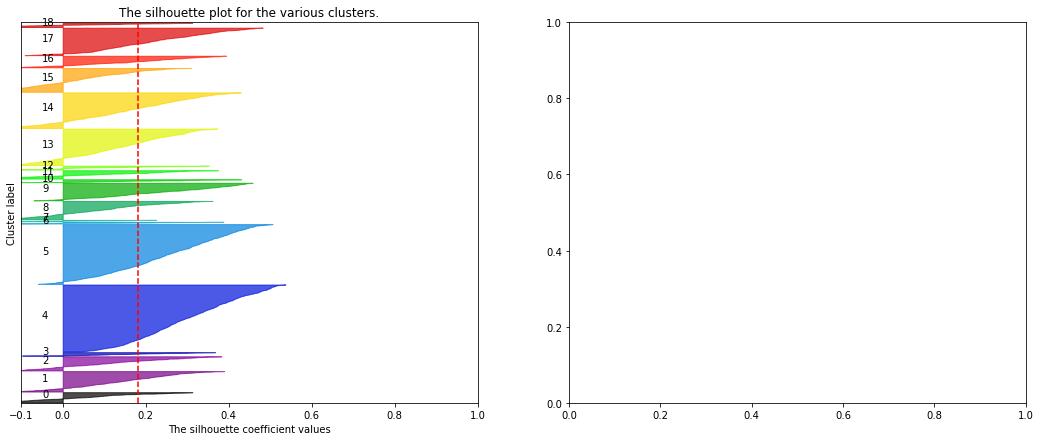

For n_clusters = 20 The average silhouette_score is : 0.17047939706


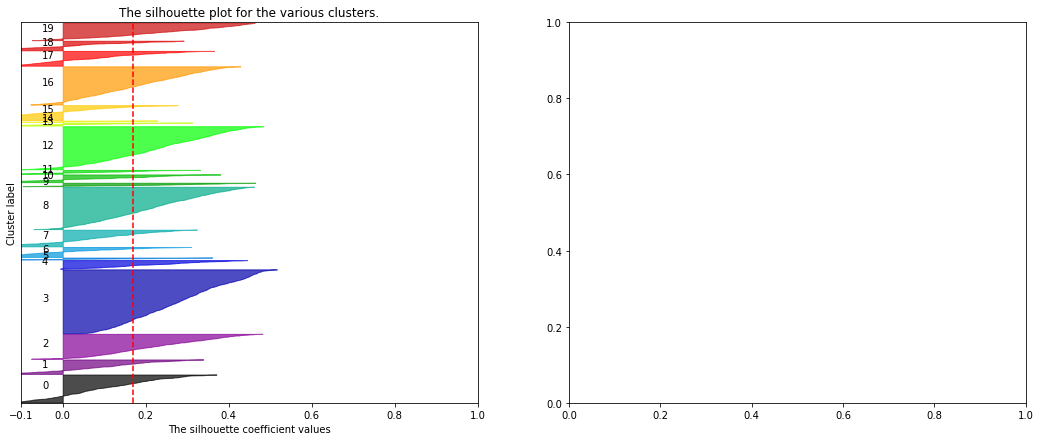

For n_clusters = 21 The average silhouette_score is : 0.175187567018


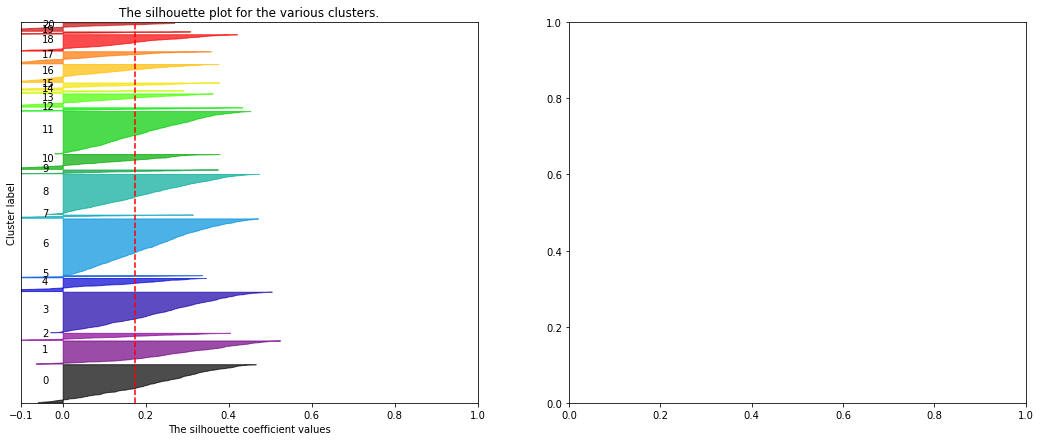

For n_clusters = 22 The average silhouette_score is : 0.177479355904


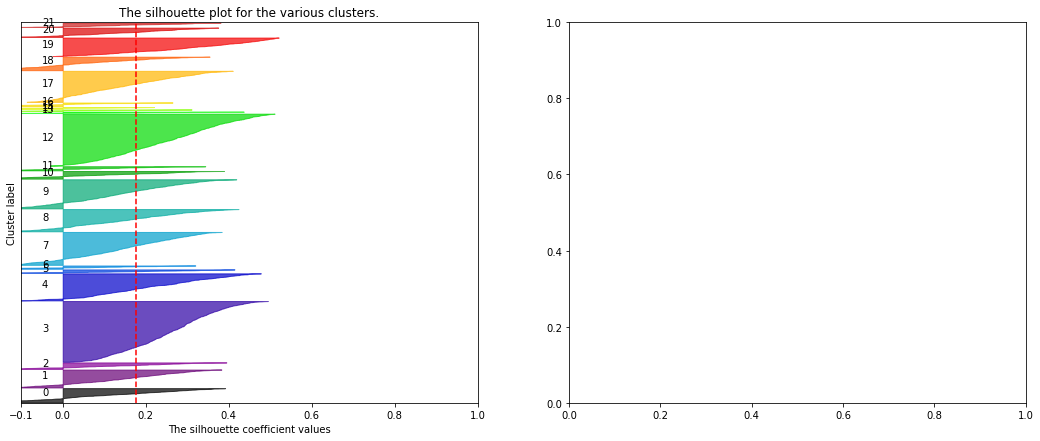

For n_clusters = 23 The average silhouette_score is : 0.180149277587


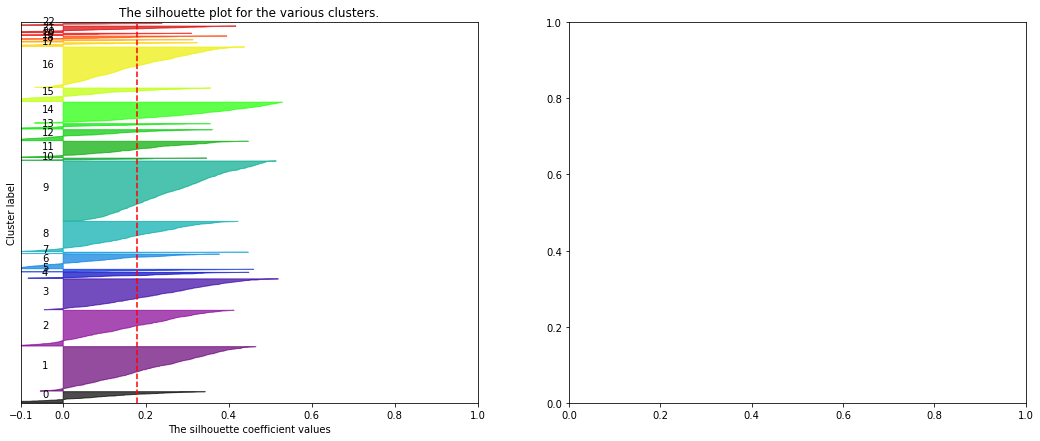

For n_clusters = 24 The average silhouette_score is : 0.174567797911


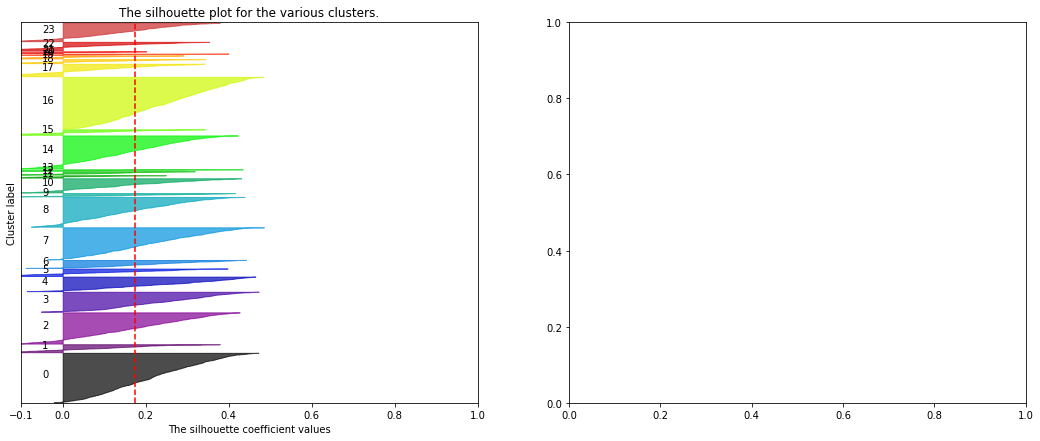

For n_clusters = 25 The average silhouette_score is : 0.17076881276


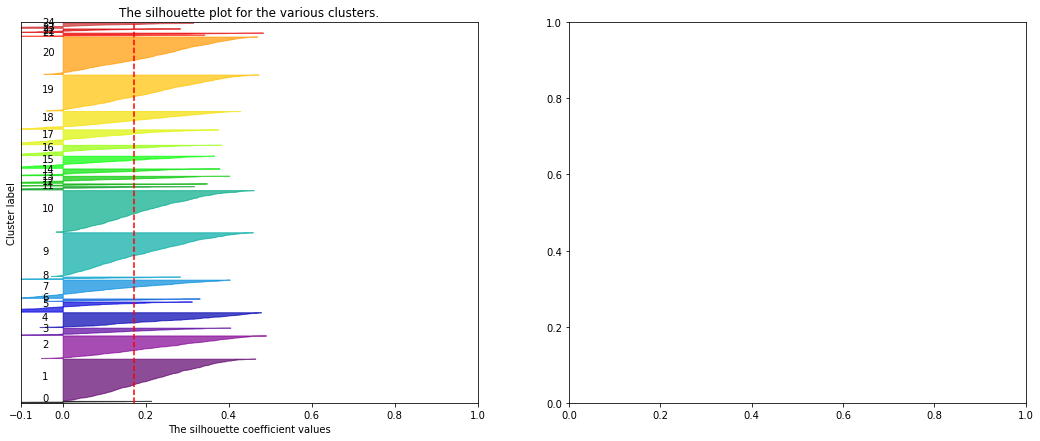

For n_clusters = 26 The average silhouette_score is : 0.167735744144


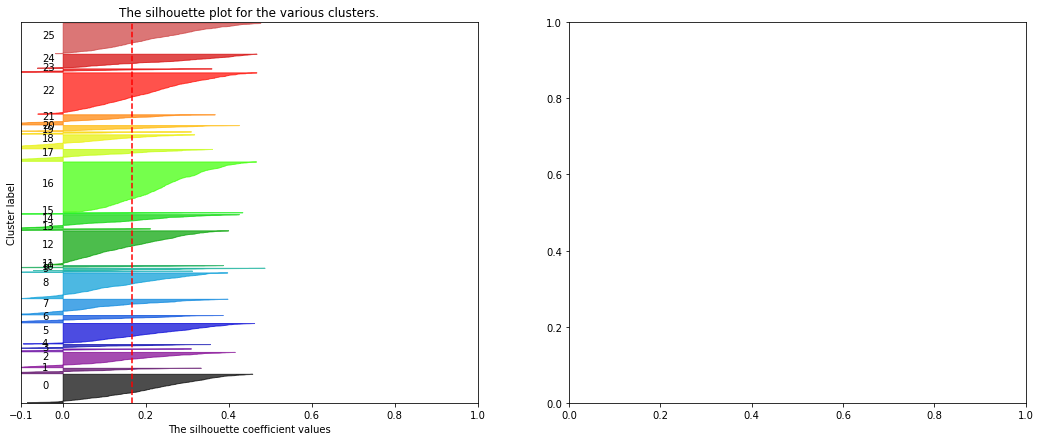

For n_clusters = 27 The average silhouette_score is : 0.163339648833


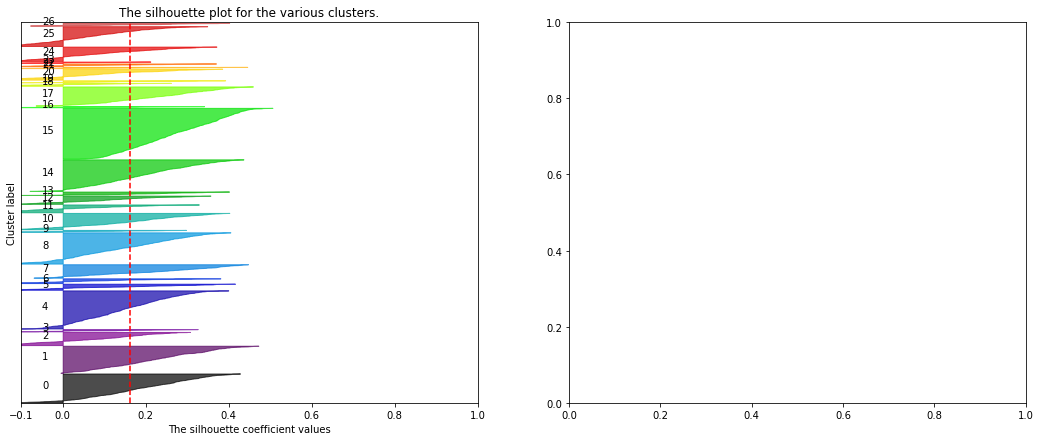

For n_clusters = 28 The average silhouette_score is : 0.170617801396


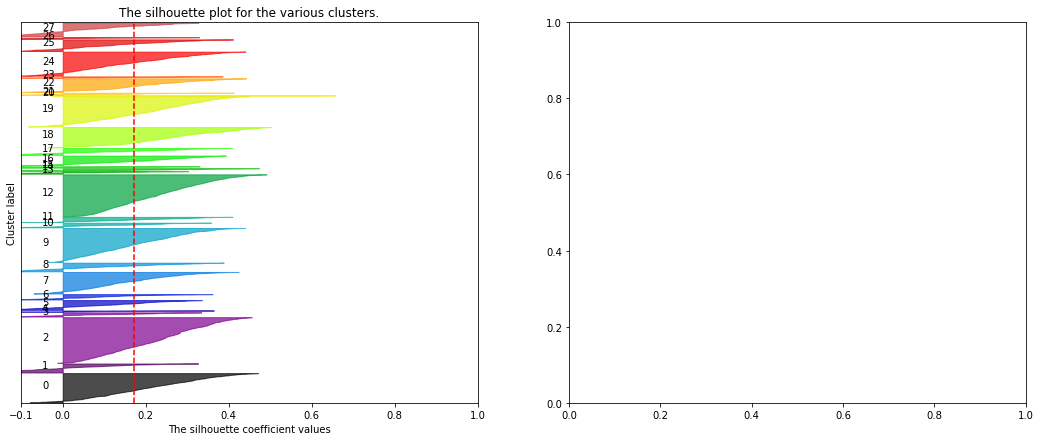

For n_clusters = 29 The average silhouette_score is : 0.168189377962


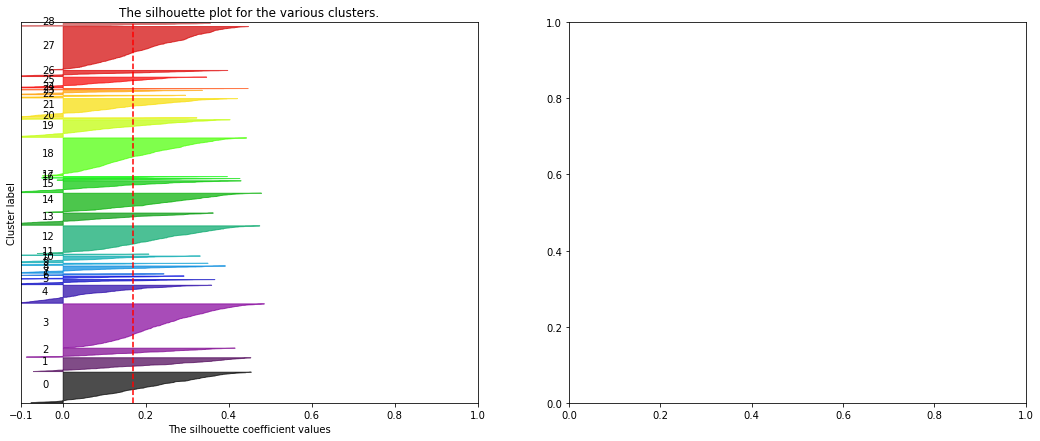

In [47]:
range_n_clusters = range(2,30)

for n_clusters in range_n_clusters:
    fig, (ax1,ax2) =plt.subplots(1,2)
    fig.set_size_inches(18,7)
    #the silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1,1]
    ax1.set_xlim([-0.1,1])
    #the (n_clusters+1)*10 is for inserting blank space between silhouette
    #plots of individual clusters, to demarcate them clearly
    ax1.set_ylim([0, len(stirling_df.iloc[:,1:].values)+(n_clusters+1)*10])
    
    #Initialize the clusterer with nclusters value a random generator
    #seed of 10 for reproducibility
    clusterer = KMeans(n_clusters = n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(stirling_df.iloc[:,1:].values)
    
    #the silhouette score gives the average value for all the samples
    #this gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(stirling_df.iloc[:,1:].values, cluster_labels)
    print("For n_clusters =", n_clusters,
         "The average silhouette_score is :", silhouette_avg)
    
    #compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(stirling_df.iloc[:,1:].values, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        #Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels==i]
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.spectral(float(i)/n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster_silhouette_values,
                         facecolor =color, edgecolor = color, alpha = 0.7)
        
        #label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower+0.5*size_cluster_i,str(i))
        
        #compute the new y_lower for next plot
        y_lower = y_upper + 10 #10 for the 0 samples
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    #The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color = 'red', linestyle='--')
    
    ax1.set_yticks([]) #clear the yaxis labels/ticks
    ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])
    
    plt.show()